
<body>
  <h2><font color="blue">Maximizing Conversions: A Comprehensive Study of Leads & Sales Performance</font></h2>
</body>

## Introduction

This notebook presents an analysis of lead conversion data collected from a travel booking company. The dataset includes various attributes related to leads, their sources, assigned agents, enquiry destinations, and the outcomes of these leads. By examining this data, we aim to uncover key insights and trends that can help in understanding the effectiveness of different lead sources, the performance of agents, and the preferences of clients.


---



### Dataset Overview

The dataset contains the following columns:

- **Lead Date:** The date when the lead was generated.
- **Lead Source:** The origin of the lead (e.g., website, referral, advertisement).
- **Name:** The name of the lead.
- **Phone:** The contact phone number of the lead.
- **Assigned To:** The agent assigned to handle the lead.
- **Enquiry Destination:** The travel destination the lead is interested in.
- **ExClient:** A flag indicating whether the lead is an existing client.
- **Status:** The current status of the lead (e.g., converted, not converted (Blank).
- **Conversion Date:** The date when the lead was converted (if applicable).
- **Trip:** Trip Name.
- **Trip Date:** The date of the booked trip (if applicable).
- **Booking ID:** The unique identifier for the booking (if applicable).
- **Pax:** The number of passengers for the booking.
- **Per Person Cost:** The cost per person for the trip.
- **Total Bill:** The total bill amount for the booking.
- **Converted By:** The agent who converted the lead.
- **Date:** The lead date (minus the timestamp). -- An Extracted Column
- **Month:** The month of lead date -- An Extracted Column

---

### Objectives

Through this analysis, we aim to answer several key questions:

1. What are the overall trends in lead generation and conversion?
2. Which lead sources are most effective in generating conversions?
3. How do different enquiry destinations fare in terms of conversion rates?
4. What is the performance of individual agents in terms of conversion rates?
5. Are there any notable patterns or anomalies in the data?

By the end of this analysis, I hope to provide actionable insights and strategic recommendations to enhance lead conversion rates and overall business performance.


## Executive Summary

### Key Insights:

1. **Lead Generation Trends:**
   - **Peak in August:** Lead count peaks in August at 33.55%, with the lowest in July at 12.63%. This suggests a strong increase in lead volume towards August, necessitating preparation for higher volumes in August and September.
   - **Lead Source Contribution:** Lead Source 1 is the dominant contributor, responsible for 71.17% of leads, indicating that optimizing this source could significantly boost overall lead generation.

2. **Trip Trends:**
   - **Decline in August 2024:** Trips dropped by 83.79% in August 2024 (130 trips) compared to the previous year (926 trips), but there was a strong recovery in October 2024 (139.06% increase with 153 trips).
   - **Seasonal Variation:** Fluctuating trip counts reflect seasonal patterns, with August and September peaking and a sharp dip in July and later months.

3. **Revenue Insights:**
   - **Revenue Performance:** August 2023 had the highest revenue (₹5.27M), but August 2024 saw a significant decline, aligning with the decrease in trips. In 2024, a steady recovery was observed, peaking in September (₹1.09M).
   - **Conversion Efficiency:** Despite the high volume of leads from Lead Source 1 (49.36% of total leads), it only contributes 33.72% of the revenue, indicating lower conversion efficiency. Lead Source 3, while smaller in volume, brings higher-value conversions.

4. **Destination Performance:**
   - **High Revenue Potential in Ladakh:** Ladakh, though having fewer leads (6657), generates the highest revenue (8.52% of total revenue), highlighting a strong potential for premium offerings.
   - **Underperforming Regions:** Destinations like Kashmir and Bhutan have low conversion rates, presenting opportunities for targeted improvements in conversion strategies.

5. **Sales Performance:**
   - **Top Performer Success:** Sales Person 0 excels with a high conversion rate from Lead Source 1 (0.474%), especially in popular trips like BYOG. This suggests a model for other team members to follow.
   - **Areas for Improvement:** Sales Persons 52, 49, and 50 have lower conversion rates and longer conversion times. These individuals would benefit from targeted coaching and process improvements.

6. **Customer Insights:**
   - **Budget Constraints:** 87% of customers prefer trips costing under ₹400,000, emphasizing the need for more affordable trip packages to cater to the majority’s spending habits.

### Recommendations:

1. **Optimize Lead Source 1 Conversion:** Since Lead Source 1 generates the majority of leads but has lower revenue conversion efficiency, focus on improving the conversion process, such as targeted follow-ups, personalized offers, and better qualification of leads.

2. **Replicate Successful Sales Strategies:** Sales Person 0’s success with specific trips (like BYOG) should be analyzed and replicated across the team. Encourage other salespersons to focus on high-conversion trips and refine their pitches based on these insights.

3. **Focus on High-Value Destinations:** Invest in optimizing marketing and sales efforts for high-revenue destinations like Ladakh and Spiti Valley, where conversion rates are higher, while improving conversion strategies for underperforming regions such as Kashmir and Bhutan.

4. **Target Budget-Conscious Customers:** Since most customers have a budget under ₹400,000, adjust the pricing strategy by offering more budget-friendly options and packages that cater to this majority.

5. **Speed up Conversion Process:** With an average of 10 days to convert a lead, work on shortening this timeline by improving response times, nurturing leads more effectively, and streamlining sales workflows to drive faster conversions.

6. **Enhance Sales Training:** Provide targeted training and performance management for salespersons with low conversion rates to help improve their efficiency, focusing on faster conversion and higher revenue.

By acting on these insights and recommendations, the business can improve lead conversion, optimize sales processes, and drive higher revenue while catering to customer preferences.

In [1]:
!touch requirements.txt
!echo -e "pandas\nmatplotlib\nscikit-learn\nscipy\nnumpy" >> requirements.txt
!pip3 install -r /kaggle/working/requirements.txt --quiet

In [2]:
#Importing Essential Libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import sqlite3
plt.rcParams['figure.figsize'] = (25,6)
plt.rcParams['font.size'] = 14
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

In [3]:
#reading the CSV
PATH = r'https://raw.githubusercontent.com/dakshbhatnagar/Datasets/main/sales_conversion/Data.csv'
df = pd.read_csv(PATH)
#removing the spaces in column names
df.columns = df.columns.str.replace(" ", "")

In [4]:
cols = list(df.columns[df.columns.str.contains('Date')])
for i in cols:
    df[i] = pd.to_datetime(df[i])
df['TripYear'] = df['TripDate'].dt.year
df['LeadYear'] = df['LeadDate'].dt.year

In [5]:
df.head()

,LeadDate,LeadSource,Name,Phone,AssignedTo,EnquiryDestination,ExClient,Status,ConversionDate,Trip,TripDate,BookingID,Pax,PerPersonCost,TotalBill,ConvertedBy,Date,Month,TripYear,LeadYear
0,2023-07-16 05:34:00,Lead Source 1,jzjwPXoyff nrw,(&))^!%@!!,Sales Person 1,Vietnam,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2023-07-16,Jul,NaN,2023
1,2023-07-16 05:39:00,Lead Source 2,mfz|Xn iwnnwY,*@!!@%*$##,Sales Person 2,Andaman,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2023-07-16,Jul,NaN,2023
2,2023-07-16 05:39:00,Lead Source 1,wwmâMãmgxm Çä,*)((^#@)!#,Sales Person 0,Himachal Trips,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2023-07-16,Jul,NaN,2023
3,2023-07-16 05:42:00,Lead Source 1,lZ sf XfmsfWwyn,(&$)##!@)%,Sales Person 3,Ladakh,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2023-07-16,Jul,NaN,2023
4,2023-07-16 05:55:00,Lead Source 1,fXwnfwfsXpl,)*&%($$$##,Sales Person 0,Spiti Valley,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2023-07-16,Jul,NaN,2023


In [6]:
df.dtypes

LeadDate              datetime64[ns]
LeadSource                    object
Name                          object
Phone                         object
AssignedTo                    object
EnquiryDestination            object
ExClient                      object
Status                        object
ConversionDate        datetime64[ns]
Trip                          object
TripDate              datetime64[ns]
BookingID                     object
Pax                          float64
PerPersonCost                float64
TotalBill                    float64
ConvertedBy                   object
Date                  datetime64[ns]
Month                         object
TripYear                     float64
LeadYear                       int32
dtype: object

In [7]:
#Null value counts (in %)
null_df = round(df.isnull().sum()/len(df)*100,2).to_frame()\
                    .reset_index().rename(columns={'index': 'Column', 0: 'Null_Pct'})\
                    .sort_values(by='Null_Pct', ascending=False).reset_index(drop=True)
null_df

,Column,Null_Pct
0,TripDate,96.54
1,ConvertedBy,96.54
2,TripYear,96.54
3,Status,96.54
4,ConversionDate,96.54
5,Trip,96.54
6,BookingID,96.54
7,Pax,96.54
8,PerPersonCost,96.54
9,TotalBill,96.54


Since where the Status is a `null` value, it means the conversion was not done and we want to be able to analyse so will not drop the null values.

In [8]:
#Some statistical Info about numerical columns
df.describe().T

,count,mean,min,25%,50%,75%,max,std
LeadDate,93481,2023-09-05 04:58:08.814411776,2023-07-16 05:34:00,2023-08-13 01:20:00,2023-09-04 19:25:00,2023-09-28 12:35:00,2023-10-24 23:56:00,NaN
ConversionDate,3232,2023-09-14 01:47:53.970916096,2023-07-17 13:13:32,2023-08-21 11:58:28,2023-09-16 15:30:06.500000,2023-10-10 14:17:22.750000128,2023-10-26 15:46:13,NaN
TripDate,3232,2023-11-03 16:53:10.099010304,2023-06-17 00:00:00,2023-09-11 18:00:00,2023-10-31 00:00:00,2023-11-28 00:00:00,2024-06-14 00:00:00,NaN
Pax,3232.0,2.108911,1.0,1.0,2.0,2.0,21.0,1.652555
PerPersonCost,3232.0,2747.937191,0.0,1764.0,2240.0,3155.25,99760.0,2849.761607
TotalBill,3232.0,5778.488552,0.0,2142.0,4128.0,6741.0,139680.0,7114.953276
Date,93481,2023-09-04 14:51:13.522961664,2023-07-16 00:00:00,2023-08-13 00:00:00,2023-09-04 00:00:00,2023-09-28 00:00:00,2023-10-24 00:00:00,NaN
TripYear,3232.0,2023.160272,2023.0,2023.0,2023.0,2023.0,2024.0,0.366915
LeadYear,93481.0,2023.0,2023.0,2023.0,2023.0,2023.0,2023.0,0.0


In [9]:
df.select_dtypes('number').corr()

,Pax,PerPersonCost,TotalBill,TripYear,LeadYear
Pax,1.000000,-0.003512,0.573051,-0.002254,NaN
PerPersonCost,-0.003512,1.000000,0.669980,0.007899,NaN
TotalBill,0.573051,0.669980,1.000000,0.012657,NaN
TripYear,-0.002254,0.007899,0.012657,1.000000,NaN
LeadYear,NaN,NaN,NaN,NaN,NaN


This correlation matrix highlights:

1.	Pax vs. TotalBill (0.573): Moderate positive correlation. As the number of people (Pax) increases, the total bill tends to rise, but not proportionally. This could mean discounts for group bookings or varying service usage.
2.	PerPersonCost vs. TotalBill (0.670): Stronger positive correlation. Higher per-person costs drive higher total bills, suggesting upselling or premium service usage.
3.	Pax vs. PerPersonCost (-0.003): Virtually no correlation. Group size does not affect the cost per person, indicating a consistent pricing strategy.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93481 entries, 0 to 93480
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   LeadDate            93481 non-null  datetime64[ns]
 1   LeadSource          93481 non-null  object        
 2   Name                93145 non-null  object        
 3   Phone               93481 non-null  object        
 4   AssignedTo          93481 non-null  object        
 5   EnquiryDestination  87424 non-null  object        
 6   ExClient            3420 non-null   object        
 7   Status              3232 non-null   object        
 8   ConversionDate      3232 non-null   datetime64[ns]
 9   Trip                3232 non-null   object        
 10  TripDate            3232 non-null   datetime64[ns]
 11  BookingID           3232 non-null   object        
 12  Pax                 3232 non-null   float64       
 13  PerPersonCost       3232 non-null   float64   

In [11]:
#setting up the sqlite3 database connection
conn = sqlite3.connect('data.db')
#Converting the data to SQLite3 DB file
df.to_sql('travels', conn, if_exists='replace', index=False)

93481

In [12]:
light_blue ='#6d9eeb'
dark_blue = '#445e93'

## Broad Overview and Trends

1. **What is the total number of leads and conversions in the dataset?**

In [13]:
rows, columns = df.shape
conversions = len(df[df['Status']=='Converted'])
conv_rows = (df['Status']=='Converted').sum()
conv_pct = round(conv_rows/rows*100,2)
print(f'There are {rows:,} leads and {conversions:,} Conversions in the dataset so conversion Rate is {conv_pct}%')

There are 93,481 leads and 3,232 Conversions in the dataset so conversion Rate is 3.46%



2. **What is the distribution of leads over different months?**

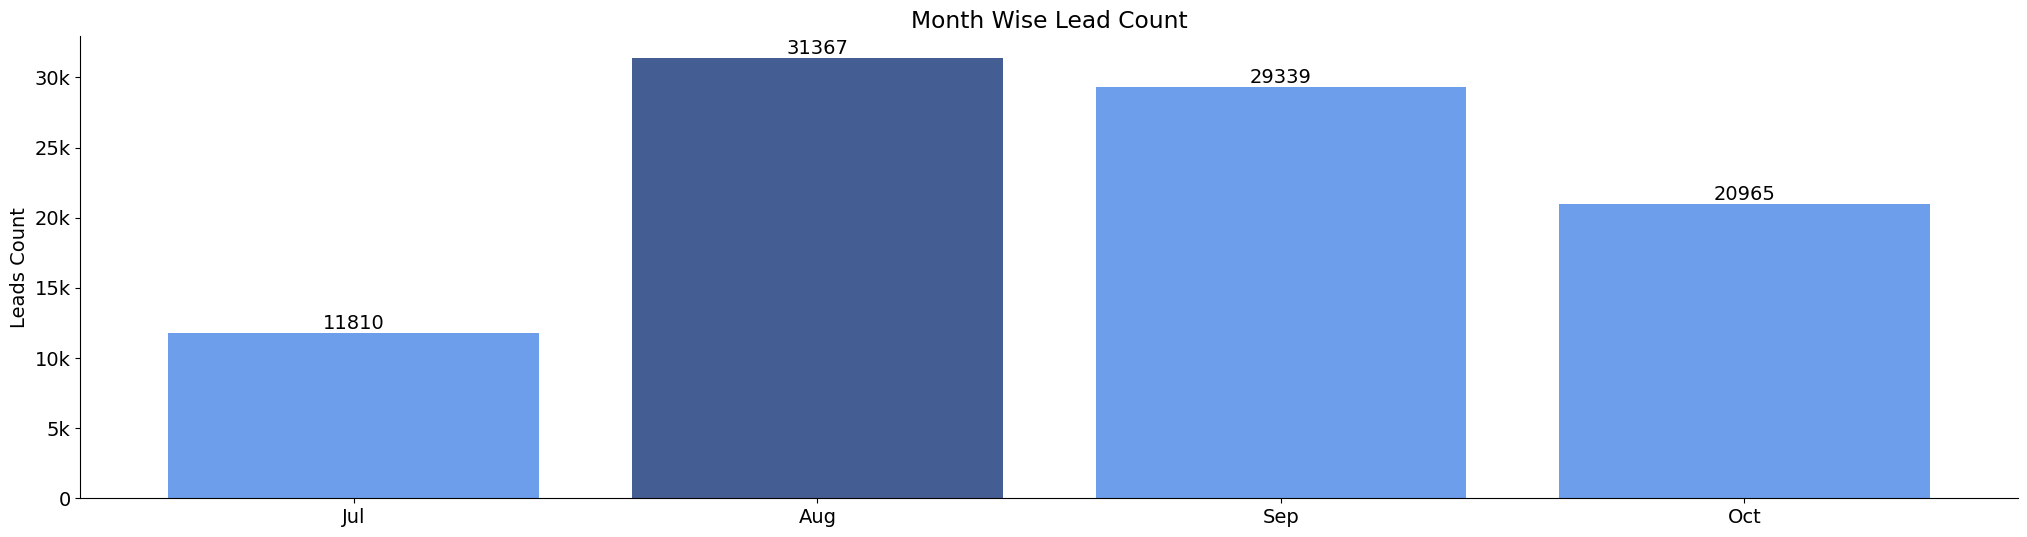

In [14]:
query = '''
select Month, count(Month) as LeadsCount, sum(TotalBill) as Revenue from travels group by Month
order by
  case when Month = 'Jul' then 1
    when Month = 'Aug' then 2
    when Month = 'Sep' then 3
    when Month = 'Oct' then 4
    else 0
  end

'''

temp = pd.read_sql(query, conn)
COLORS =[light_blue] * len(temp)
COLORS[1] = dark_blue
ax = plt.bar(data=temp, x='Month', height = 'LeadsCount', color=COLORS)
plt.bar_label(ax)
yticks = plt.gca().get_yticks()
ylabels = [f"{round(i / 1000)}k" if i != 0 else "0" for i in yticks]
plt.gca().set_yticklabels(ylabels)
plt.title('Month Wise Lead Count')
plt.ylabel('Leads Count')
plt.show()

In [15]:
data = {temp['Month'][i] : round(temp['LeadsCount'][i] / temp['LeadsCount'].sum()*100,2) for i in range(len(temp))}
pct = pd.DataFrame(data.items(), columns=['Month', 'Lead_Pct'])
pct

,Month,Lead_Pct
0,Jul,12.63
1,Aug,33.55
2,Sep,31.38
3,Oct,22.43


**Insight** 

- Lead count peaks in August at 33.55%, with the lowest in July at 12.63%. This indicates a steady increase from July, reaching its maximum in August, before tapering off in September and October. This trend highlights the need to prepare for handling higher lead volumes in August and September effectively.

In [16]:
query = '''
with cte as (
select TripYear, Month, count(Month) as TripCount from travels
      where TripYear is not null group by 1,2
order by 1,
  case when Month = 'Jul' then 1
    when Month = 'Aug' then 2
    when Month = 'Sep' then 3
    when Month = 'Oct' then 4
    else 0
  end)
  
select *, round(TripCount *1.0/ sum(TripCount) over() ,4)*100 as Pct from cte group by 1,2

'''
temp = pd.read_sql(query, conn)
temp['Pct_Change'] =  round(temp['TripCount'].pct_change()*100,2).fillna(0)
temp

,TripYear,Month,TripCount,Pct,Pct_Change
0,2023.0,Aug,926,28.65,0.00
1,2023.0,Jul,443,13.71,-52.16
2,2023.0,Oct,543,16.80,22.57
3,2023.0,Sep,802,24.81,47.70
4,2024.0,Aug,130,4.02,-83.79
5,2024.0,Jul,64,1.98,-50.77
6,2024.0,Oct,153,4.73,139.06
7,2024.0,Sep,171,5.29,11.76


**Insight** -

1.	Trip Trends: The highest number of trips occurred in August 2023 (926 trips, 28.65%), followed by September 2023 (802 trips, 24.81%).
2.	Significant Decline in 2024: A sharp decline is observed in August 2024, with a 83.79% decrease in trips compared to August 2023 (130 trips, 4.02%).
3.	Growth in October 2024: October 2024 shows a significant increase (139.06% change) in trip count (153 trips), indicating a strong recovery or new trend.
4.	Monthly Variation: July 2024 saw the least number of trips (64 trips, 1.98%), representing the lowest point in the year.

**Question** - What does our Month Wise Revenue look like?

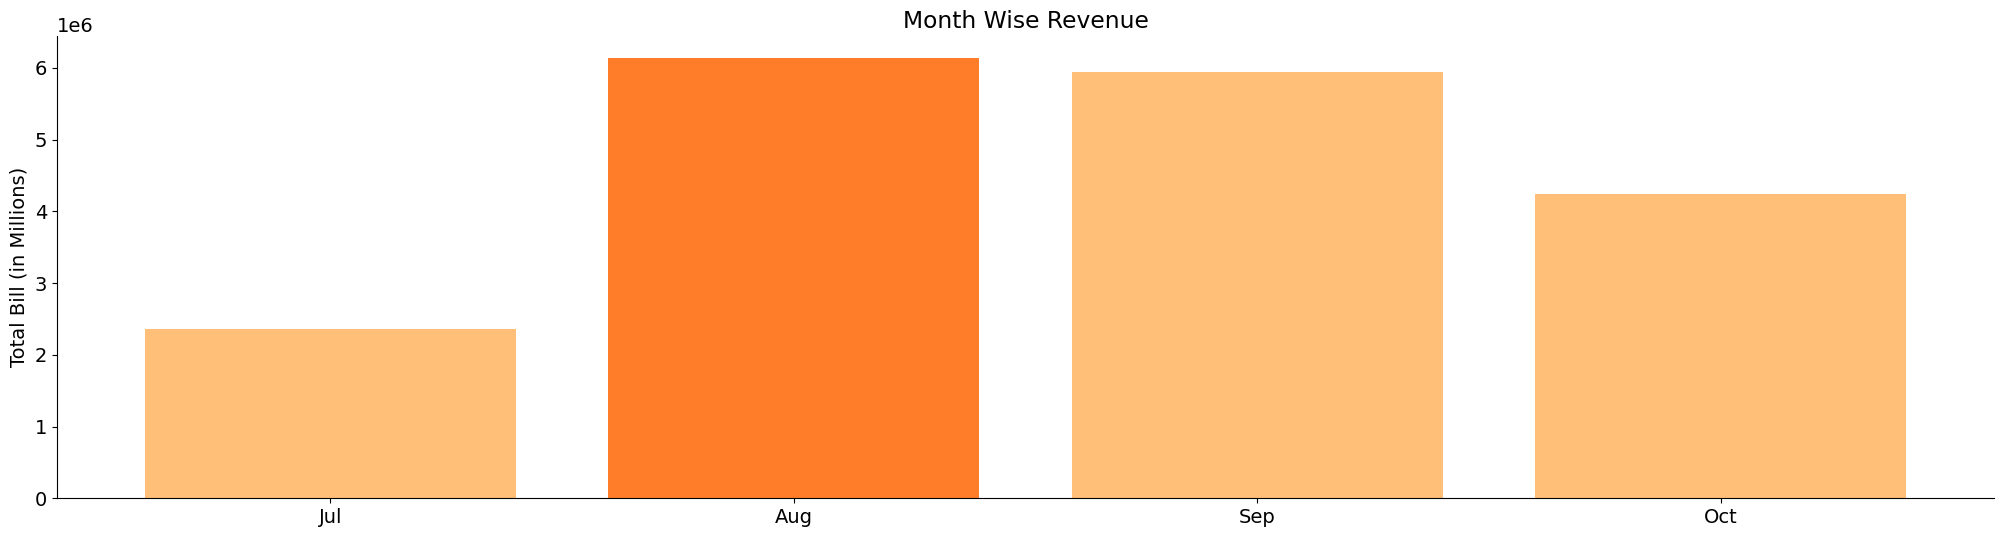

In [17]:
query = '''
select Month, sum(TotalBill) as Revenue from travels group by Month
order by
  case when Month = 'Jul' then 1
    when Month = 'Aug' then 2
    when Month = 'Sep' then 3
    when Month = 'Oct' then 4
    else 0
  end

'''
temp = pd.read_sql(query, conn)
COLORS =['#FFBF78'] * len(temp)
COLORS[1] = '#FF7D29'
plt.bar(data=temp, x='Month', height = 'Revenue', color=COLORS)
plt.ylabel('Total Bill (in Millions)')
plt.title('Month Wise Revenue')
plt.show()

In [18]:
data = {temp['Month'][i] : round(temp['Revenue'][i] / temp['Revenue'].sum()*100,2) for i in range(len(temp))}
pct = pd.DataFrame(data.items(), columns=['Month', 'Revenue_Pct'])
pct

,Month,Revenue_Pct
0,Jul,12.66
1,Aug,32.84
2,Sep,31.83
3,Oct,22.67


**Insight** - 

1. Highest Revenue in August: The highest revenue percentage was achieved in August (32.84%), contributing significantly to the overall performance.
2.	Revenue Decline in October: Revenue dropped to 22.67% in October, marking the lowest point of the period.
3.	Steady Performance in September: Revenue remained stable in September (31.83%), indicating consistent performance.
4.	Moderate Revenue in July: July had the lowest revenue percentage (12.66%), suggesting a slow start compared to the other months.

**Question** - Compare Revenue Year and month wise based on Trips taken.

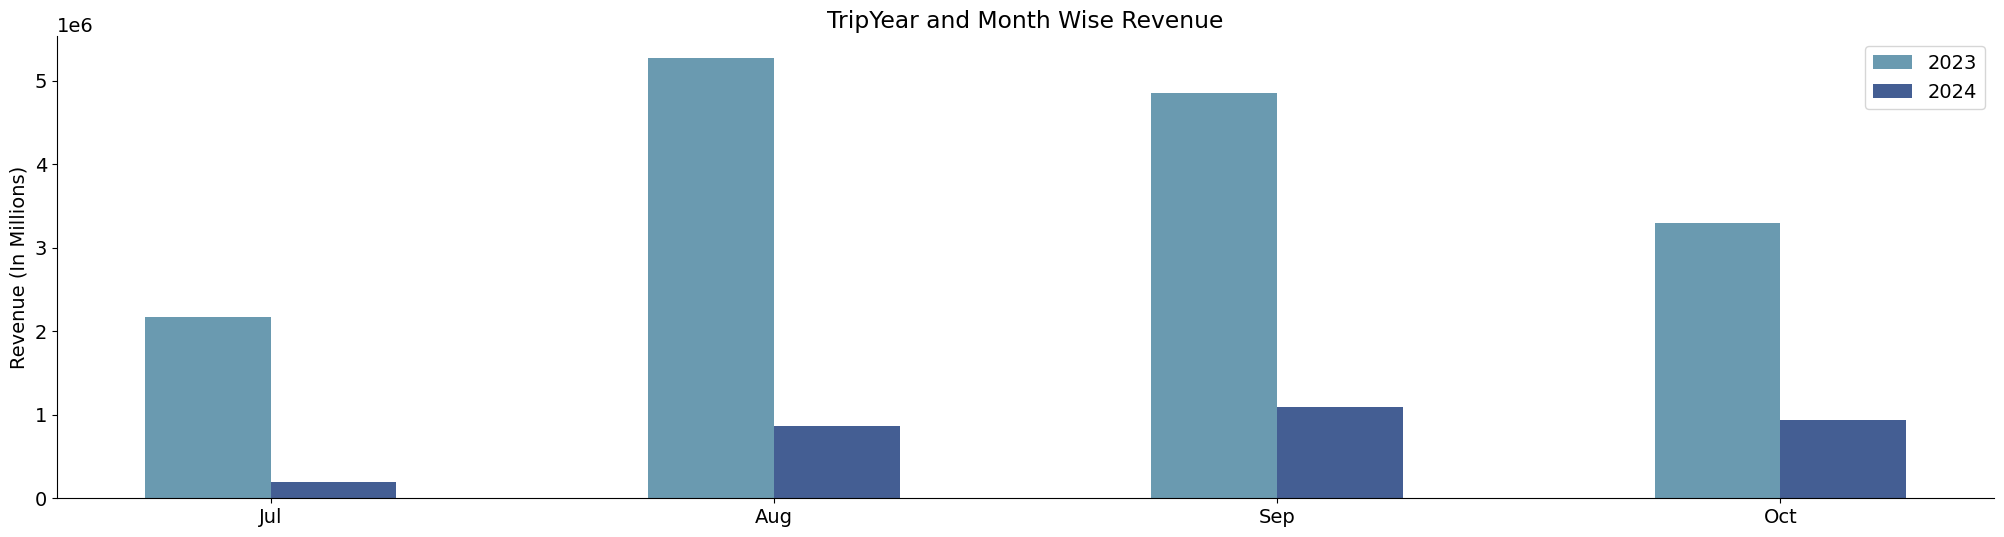

In [19]:
query = '''
select TripYear, Month, sum(TotalBill) as Revenue from travels where TripYear is not null group by 1,2
order by 1,
  case when Month = 'Jul' then 1
    when Month = 'Aug' then 2
    when Month = 'Sep' then 3
    when Month = 'Oct' then 4
    else 0
  end

'''
temp = pd.read_sql(query, conn)
temp['TripYear'] = pd.to_numeric(temp['TripYear'])
temp_2023 = temp[temp['TripYear']==2023]
temp_2024 = temp[temp['TripYear']==2024]
r = np.arange(len(temp_2023))
WIDTH = 0.25
plt.bar(r, height=temp_2023['Revenue'], width=WIDTH , color = ['#6A9AB0'])
plt.bar(r+WIDTH, temp_2024['Revenue'], width=WIDTH, color =dark_blue)
plt.xticks(r + WIDTH / 2, temp_2024['Month'])
plt.title('TripYear and Month Wise Revenue')
plt.legend([2023, 2024])
plt.ylabel('Revenue (In Millions)')
plt.show()

**Insight** 

- In 2023, revenue peaked in August at ₹5.27M before declining steadily through October, with July having the lowest at ₹2.17M. In 2024, revenue started much lower, at ₹0.20M in July, but showed consistent recovery, peaking at ₹1.09M in September and slightly tapering to ₹0.94M in October. This highlights a need to replicate strategies that drove August 2023’s success to sustain and accelerate the recovery trend in 2024.


3. From which source are we getting the leads the most and the least?

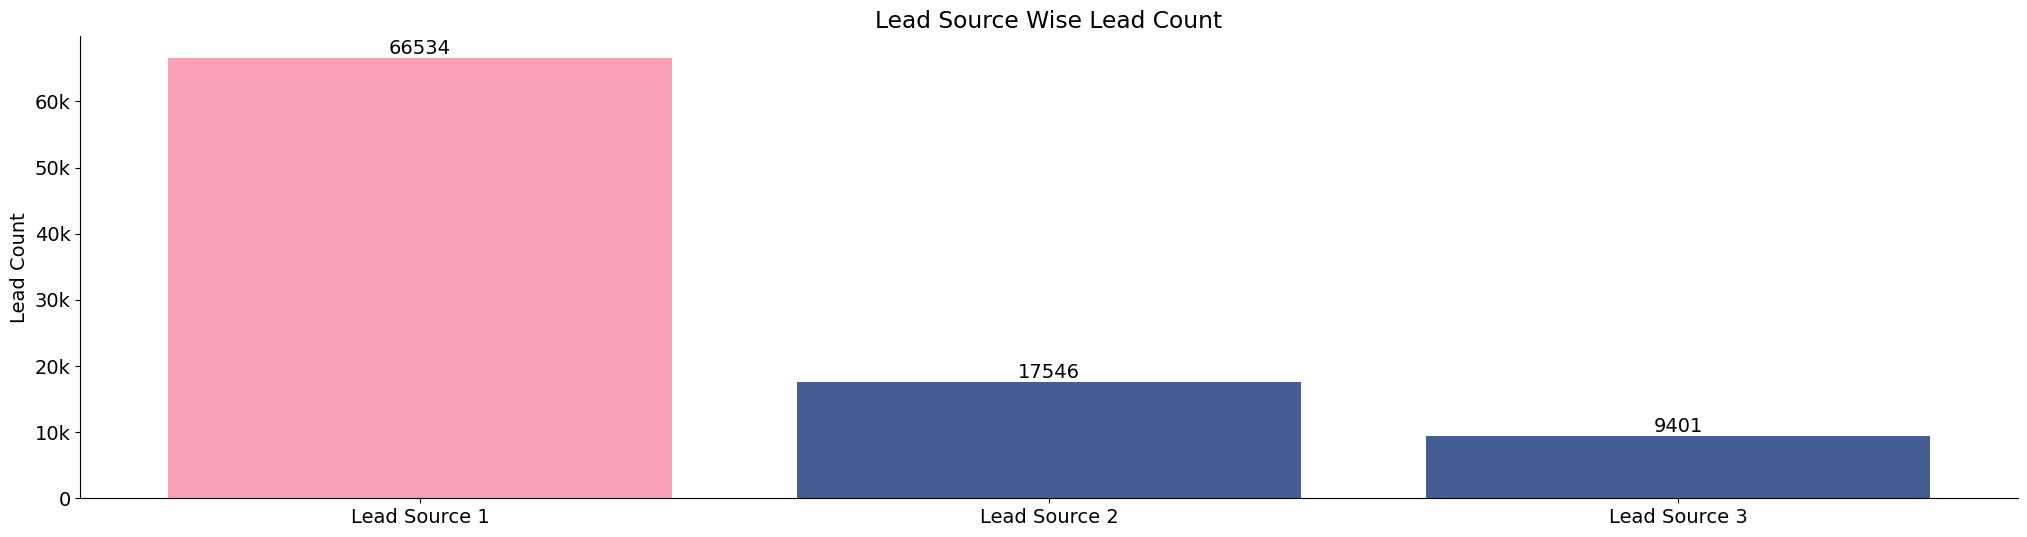

In [20]:
query = '''
select LeadSource, count(LeadSource) as LeadsCount 
from travels group by 1 order by 2 desc
'''

temp = pd.read_sql(query, conn)
COLORS =[dark_blue] * len(temp)
COLORS[0] = '#FBA1B7'
ax = plt.bar(x=temp['LeadSource'], height=temp['LeadsCount'], color=COLORS)
# Add labels to the bars
plt.bar_label(ax)
yticks = plt.gca().get_yticks()
ylabels = [f"{round(i / 1000)}k" if i != 0 else "0" for i in yticks]
plt.gca().set_yticklabels(ylabels)
plt.title('Lead Source Wise Lead Count')
plt.ylabel('Lead Count')
plt.show()

In [21]:
data = {temp['LeadSource'][i] : round(temp['LeadsCount'][i] / temp['LeadsCount'].sum()*100,2) for i in range(len(temp))}
pct = pd.DataFrame(data.items(), columns=['LeadSource', 'Leads_Pct'])
pct

,LeadSource,Leads_Pct
0,Lead Source 1,71.17
1,Lead Source 2,18.77
2,Lead Source 3,10.06


Insight

- Lead Source 1 contributes the largest share of leads at 71.17%, followed by Lead Source 2 at 18.77% and Lead Source 3 at 10.06%. This indicates that the majority of leads are coming from Lead Source 1, which suggests focusing on optimizing and scaling strategies related to this lead source to further boost lead generation.

**Question** - Plot Lead Source Wise Revenue

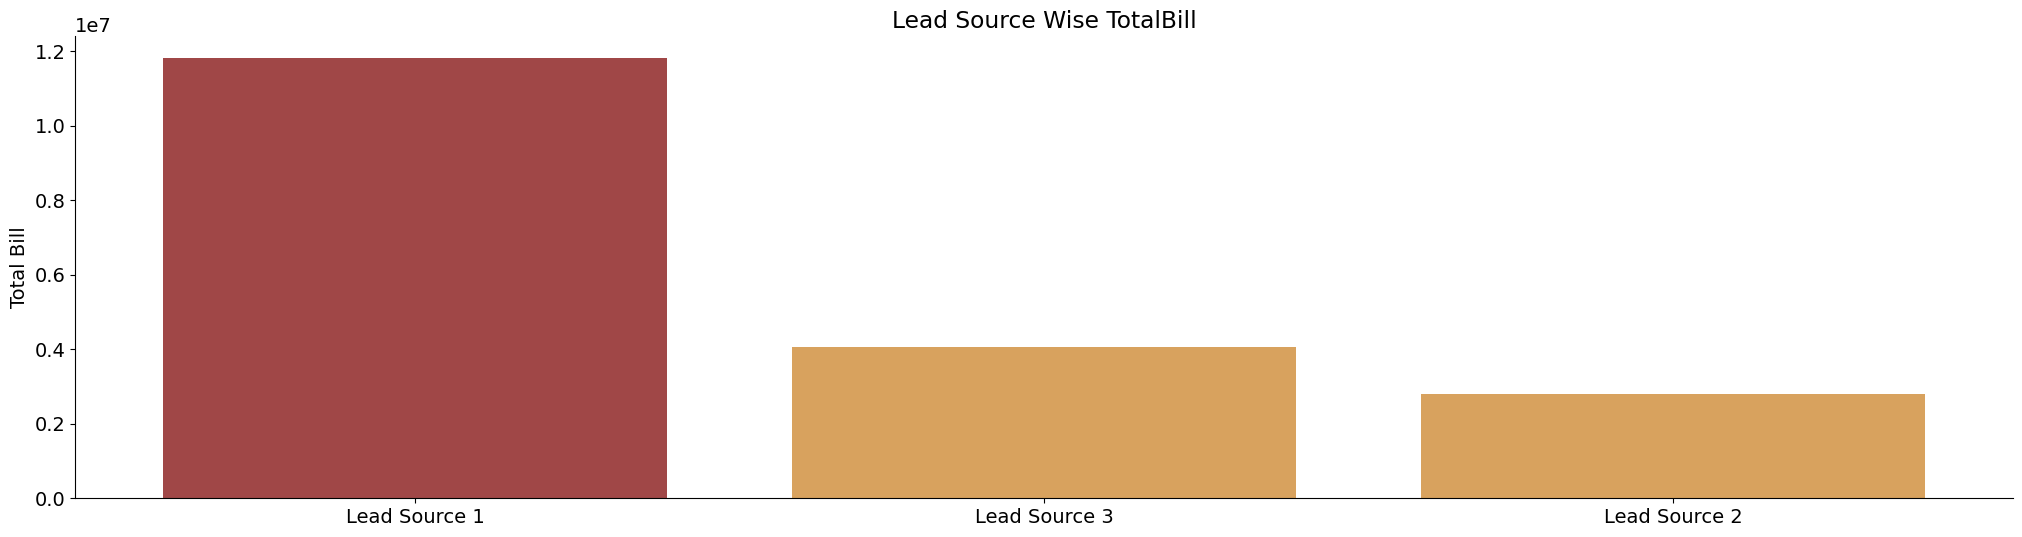

In [22]:
query = '''
select LeadSource, 
    sum(TotalBill) as TotalBill 
from travels 
group by 1 
order by 2 desc
'''
temp = pd.read_sql(query, conn)
COLORS =['#D8A25E'] * len(temp)
COLORS[0] = '#A04747'
plt.bar(data=temp, x='LeadSource', height = 'TotalBill', color=COLORS)
plt.title('Lead Source Wise TotalBill')
plt.ylabel('Total Bill')
plt.show()

**Insight** : 

- Lead Source 1 generates the highest total bill at 11.81 million, followed by Lead Source 3 at 4.07 million and Lead Source 2 at 2.80 million. This suggests that although Lead Source 1 contributes the most in terms of lead volume, it also brings in the highest revenue, indicating its strong impact on overall sales. Focusing on optimizing and nurturing leads from this source could further enhance revenue.

**Question** - What does our Lead Source And Month Wise Trip Count look like?

In [23]:
query = '''
select TripYear, Month, LeadSource, count(LeadSource) as LeadCount from travels 
        where TripYear is not null group by 1,2,3
order by 1,
  case when Month = 'Jul' then 1
    when Month = 'Aug' then 2
    when Month = 'Sep' then 3
    when Month = 'Oct' then 4
    else 0
  end,
  2

'''

temp = pd.read_sql(query, conn)
temp['TripYear'] = pd.to_numeric(temp['TripYear'])
temp_2023 = temp[temp['TripYear']==2023]
temp_2024 = temp[temp['TripYear']==2024]
r = np.arange(len(temp_2023))
WIDTH = 0.25

In [24]:
LABELS_2023 = [(i.replace("Lead", "").strip() + " " +j) for i, j in zip(temp_2023['LeadSource'], temp_2023['Month'])]
LABELS_2024 = [(i.replace("Lead", "").strip() + " " +j) for i, j in zip(temp_2024['LeadSource'], temp_2024['Month'])]

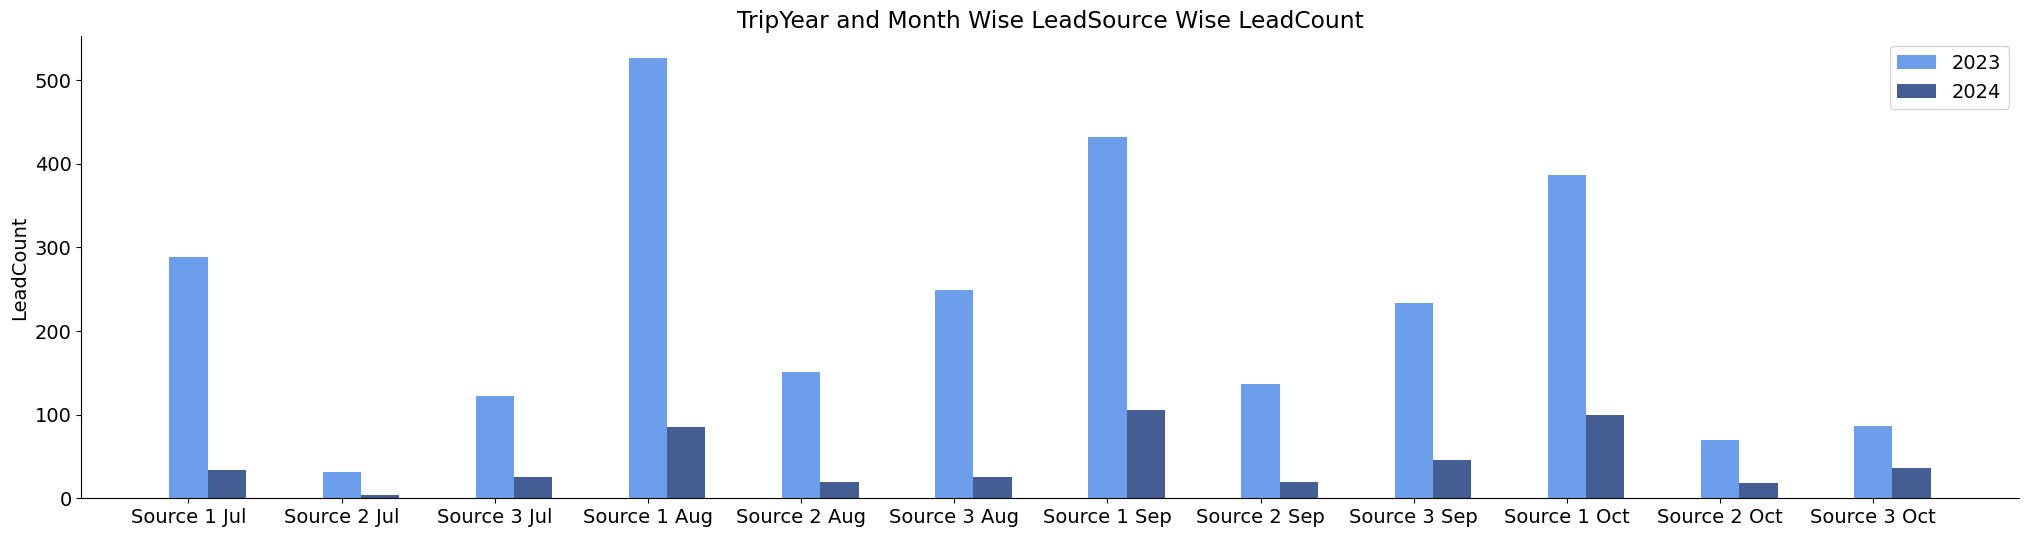

In [25]:
#Bars for 2023
plt.bar(r, height=temp_2023['LeadCount'], width=WIDTH , color=light_blue)
plt.xticks(r, LABELS_2023, rotation=0)

#Bars for 2024
plt.bar(r+WIDTH, height=temp_2024['LeadCount'], width=WIDTH , color=dark_blue)
plt.xticks(r, LABELS_2024, rotation=0)

#Cosmetic Additions
plt.title('TripYear and Month Wise LeadSource Wise LeadCount')
plt.legend([2023, 2024])
plt.ylabel('LeadCount')
plt.show()

**Insight**

- In July 2023, Lead Source 1 had the highest lead count with 289, while Lead Source 2 and Lead Source 3 had 32 and 122 leads respectively. This trend continued in August, with Lead Source 1 leading again at 526, followed by Lead Source 3 at 249 and Lead Source 2 at 151. However, in 2024, lead counts significantly dropped across all sources, especially for Lead Source 2. This indicates a shift in lead generation that needs to be addressed to ensure steady conversion rates.

4. **What are the most popular enquiry destinations?**

In [26]:
query = '''
select EnquiryDestination,
      Count(EnquiryDestination) as LeadCount,
      
      round(Count(EnquiryDestination)*100.0/(select count(EnquiryDestination) from travels),2) as Lead_Pct,
      
      sum(TotalBill) as Revenue,
      round(sum(TotalBill)*100.0/(select sum(TotalBill) from travels),2) as Revenue_Pct
from travels
group by EnquiryDestination
order by Lead_Pct desc
'''
temp = pd.read_sql(query, conn)
temp.head()

,EnquiryDestination,LeadCount,Lead_Pct,Revenue,Revenue_Pct
0,Meghalaya,7932,9.07,686610.0,3.68
1,Bali,6806,7.79,938252.0,5.02
2,Ladakh,6657,7.61,1590486.0,8.52
3,Spiti Valley,6190,7.08,958192.0,5.13
4,Leh Ladakh,5698,6.52,758208.0,4.06


**Insight** 

- Meghalaya leads with the highest number of leads at 7932, contributing 9.07% of the total lead count. However, Ladakh, despite having fewer leads (6657), generates the highest revenue (8.52% of total revenue), indicating strong revenue potential despite a lower volume. Bali and Spiti Valley show significant contributions to both lead count and revenue, with Bali contributing 5.02% of the total revenue.

In [27]:
#Correlation between Overall LeadCount and Revenue
temp[['LeadCount', 'Revenue']].corr()

,LeadCount,Revenue
LeadCount,1.000000,0.221554
Revenue,0.221554,1.000000


The low correlation (0.22) between lead count and revenue suggests that many leads are not converting into revenue, pointing to poor conversion rates. This indicates inefficiencies in the sales process or challenges in moving leads through the funnel effectively. Addressing this could involve analyzing lead quality, improving nurturing strategies, or optimizing sales workflows.

Let's find out the Lead Source Distribution in Meghalaya

In [28]:
query = '''
select 'Meghalaya' as EnquiryDestination, LeadSource,
      Count(EnquiryDestination) as LeadCount,
      sum(TotalBill) as Revenue
from travels where EnquiryDestination = 'Meghalaya'
group by 2
'''
temp = pd.read_sql(query, conn)
temp

,EnquiryDestination,LeadSource,LeadCount,Revenue
0,Meghalaya,Lead Source 1,3915,326997.0
1,Meghalaya,Lead Source 2,3385,150646.0
2,Meghalaya,Lead Source 3,632,208967.0


This data provides insights into revenue performance for Meghalaya and by Lead Source:

1.	Lead Source Comparison:
	-	Lead Source 1 generated the highest revenue (₹326,997) and the most leads (3,915), indicating a strong conversion rate and effectiveness.
	-	Lead Source 3, despite fewer leads (632), contributed a significant revenue share (₹208,967), suggesting higher-value customers.
2.	Destination Performance:
	-	For Meghalaya, Lead Source 1 dominates in volume and revenue, but Lead Source 3 may attract premium clients.

In [29]:
data = {temp['LeadSource'][i] : round(temp['LeadCount'][i] / temp['LeadCount'].sum()*100,2) for i in range(len(temp))}
pct = pd.DataFrame(data.items(), columns=['LeadSource', 'Leads_Pct'])
pct

,LeadSource,Leads_Pct
0,Lead Source 1,49.36
1,Lead Source 2,42.68
2,Lead Source 3,7.97


In [30]:
#Correlation between Meghalaya LeadCount and Revenue
temp[['LeadCount', 'Revenue']].corr()

,LeadCount,Revenue
LeadCount,1.000000,0.337231
Revenue,0.337231,1.000000


- Lead Source 1 generates nearly half of the leads (49.36%) but only 33.72% of the revenue, indicating a lower conversion efficiency. Lead Source 2 shows a more balanced relationship between leads and revenue, while Lead Source 3, contributing just 7.97% of leads, has a smaller impact on both lead count and revenue. With a moderate correlation of 0.34 between lead count and revenue, there’s potential for optimizing conversion strategies to improve revenue from the large volume of leads, especially from Lead Source 1.

**Question** - Which destination is being enquired about the most and what's the revenue from there like??

In [31]:
query = '''
select EnquiryDestination,
        Count(EnquiryDestination) as LeadCount,
        sum(TotalBill) as Revenue
from travels where EnquiryDestination is not null
group by EnquiryDestination order by 3 desc limit 5
'''
temp = pd.read_sql(query, conn)
temp

,EnquiryDestination,LeadCount,Revenue
0,Ladakh,6657,1590486.0
1,Spiti Valley,6190,958192.0
2,Europe,1722,952050.0
3,Bali,6806,938252.0
4,Leh Ladakh,5698,758208.0


**Insight** 

-  Ladakh leads in both lead count (6657) and revenue (1,590,486), followed by Spiti Valley with 6190 leads and 958,192 in revenue. Bali, generating 6806 leads, contributes 938,252 in revenue. Europe, despite fewer leads (1722), achieves significant revenue (952,050). Leh Ladakh, with 5698 leads, generates 758,208 in revenue. Ladakh and Spiti Valley show the highest lead-to-revenue efficiency.


## Conversion and Client Insights

5. **What percentage of leads are from ex-clients?**

In [32]:
query = '''
select round(count(*)*1.0/(select count(*) from travels)*100,3) as ExClient_PctLeads
from travels where ExClient = 'Yes'
'''
ex_conv_pct = pd.read_sql(query, conn).values[0][0]
print(f"Percent of Leads from Ex Clients : {ex_conv_pct}%")

Percent of Leads from Ex Clients : 3.658%


**Insight** : The conversion rate from ExClients is 3.65% meaning 4 out of 100 conversions come from clients who have travelled with us or availed our services in the past

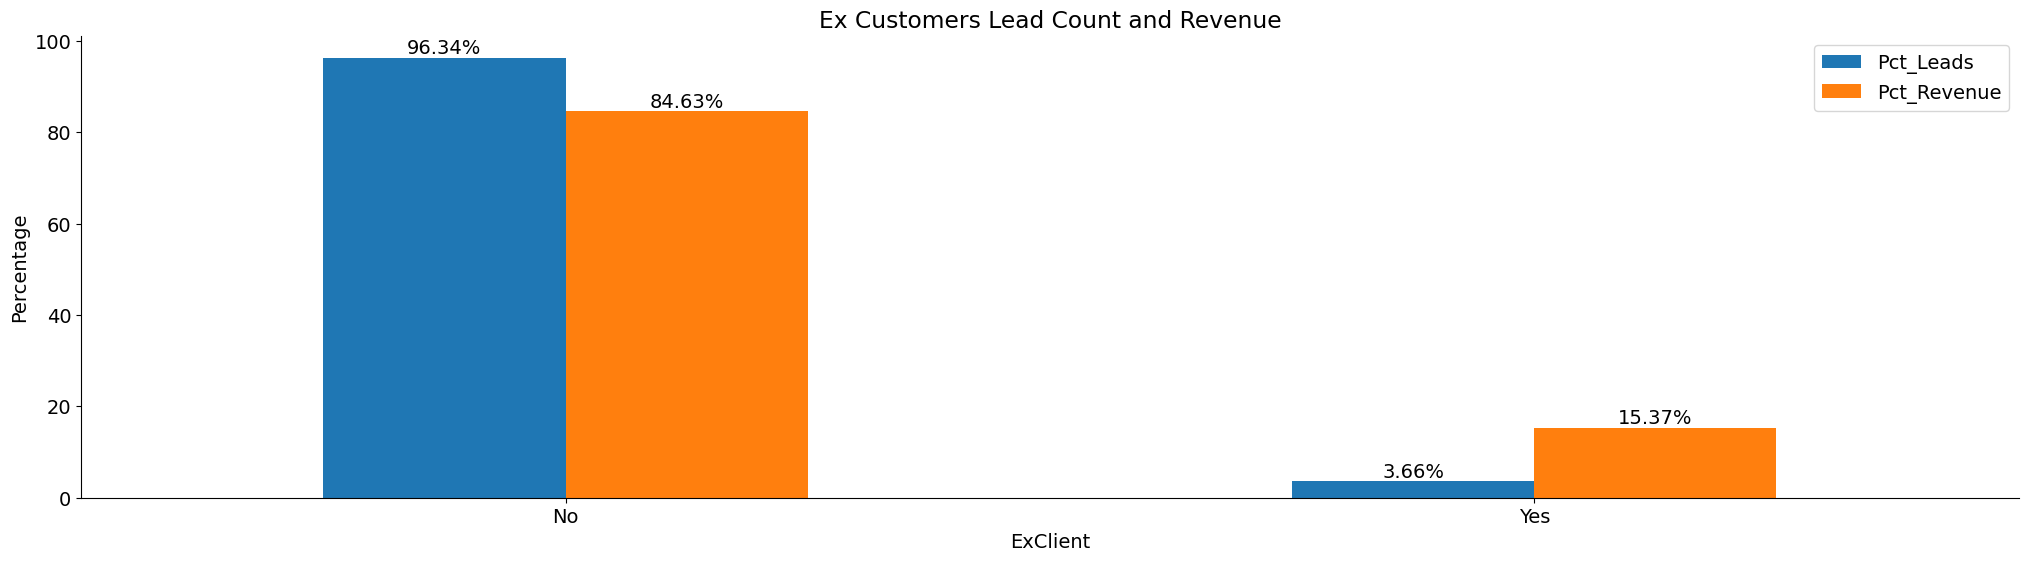

In [33]:
query = '''
select ExClient, round(count(*)*1.0/(select count(*) from travels)*100,3) as Pct_Leads,
        round(sum(TotalBill)*1.0/(select sum(TotalBill) from travels)*100,3) as Pct_Revenue
from travels group by 1
'''
ExClient_df = pd.read_sql(query, conn)
ExClient_df['ExClient'].iloc[0] = 'No'
ax = ExClient_df.set_index('ExClient').plot(kind='bar')
# Add bar labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', label_type='edge')  # Format labels as percentages
plt.title('Ex Customers Lead Count and Revenue')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

**Insight** -  We get 15% revenue from our ex clients which is equal to 3% of the total clients.

7. **Which sources of leads have the highest conversion rates?**

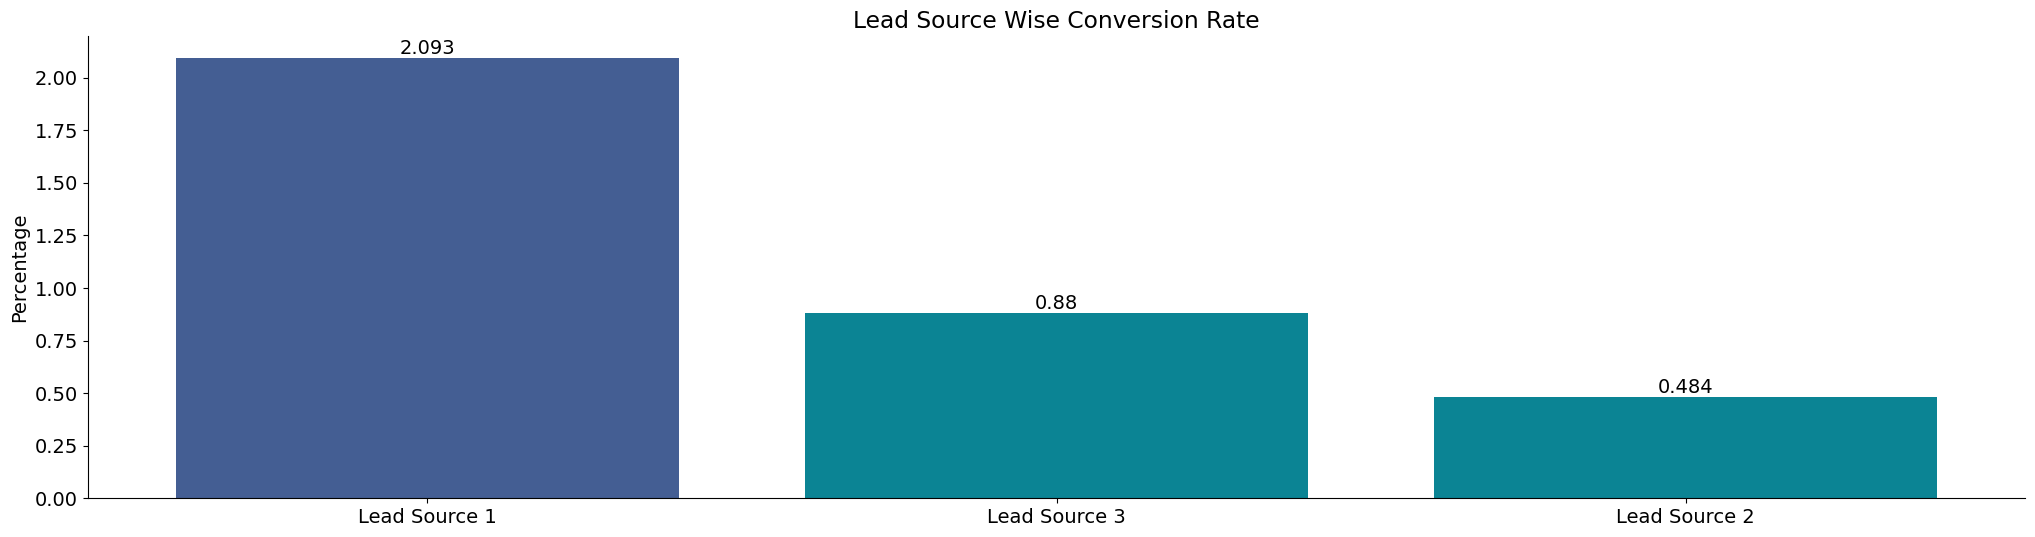

In [34]:
query = '''
select LeadSource, round(count(*)*1.0/(select count(*) from travels)*100,3) as Conversion_Rate
from travels where Status = 'Converted'
group by 1 order by 2 desc
'''
temp = pd.read_sql(query, conn)
COLORS =['#0B8494'] * len(temp)
COLORS[0] = dark_blue
ax = plt.bar(data=temp, x='LeadSource', height = 'Conversion_Rate', color=COLORS)
plt.bar_label(ax)
plt.title('Lead Source Wise Conversion Rate')
plt.ylabel('Percentage')
plt.show()

**Insight** - Lead Source 1 has the highest conversion rate at 2.093, significantly outperforming Lead Source 3 (0.880) and Lead Source 2 (0.484). This indicates that Lead Source 1 is more effective in converting leads into actual sales or actions compared to the other sources.

8. Which destinations have the highest conversion rates?

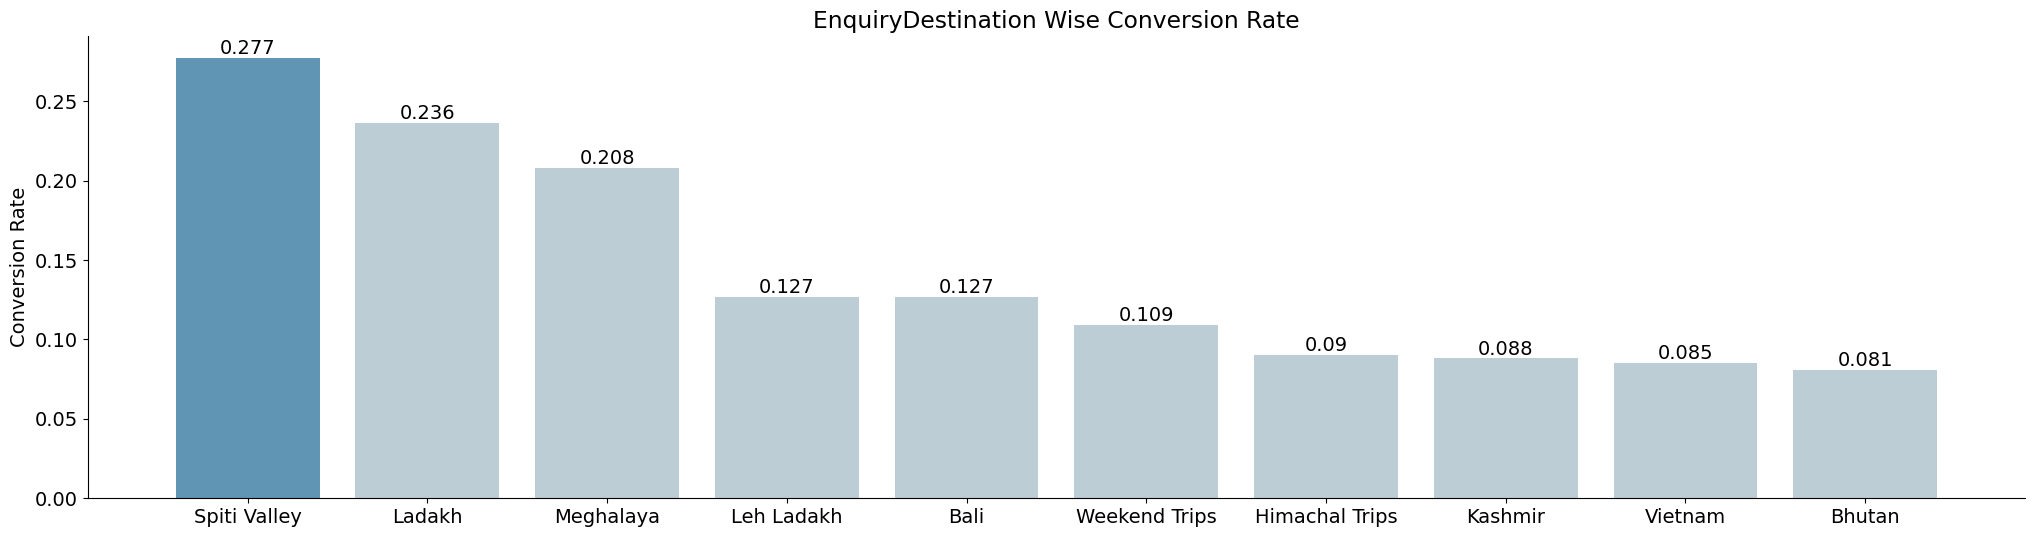

In [35]:
query = '''
SELECT 
    EnquiryDestination, 
    ROUND(
        COUNT(EnquiryDestination) * 1.0 / 
        (SELECT COUNT(*) FROM travels WHERE EnquiryDestination IS NOT NULL) * 100, 
        3
    ) AS Conversion_Rate
FROM travels 
WHERE Status = 'Converted' AND EnquiryDestination IS NOT NULL
GROUP BY EnquiryDestination
ORDER BY Conversion_Rate DESC
LIMIT 10;
'''
temp = pd.read_sql(query, conn)
COLORS =['#BDCDD6'] * len(temp)
COLORS[0] = '#6096B4'
ax = plt.bar(data=temp, x='EnquiryDestination', height = 'Conversion_Rate', color=COLORS)
plt.bar_label(ax)
plt.ylabel('Conversion Rate')
plt.title('EnquiryDestination Wise Conversion Rate')
plt.show()

**Insight**

- Conversion Rate is the maximum for Spiti Valley followed by Ladakh and Meghalaya.

In [36]:
query = '''
SELECT Trip, COUNT(Trip) AS TripCount 
FROM travels 
WHERE Status = 'Converted' 
    AND EnquiryDestination = 'Spiti Valley' 
    AND (LOWER(Trip) NOT LIKE '%reject%' AND LOWER(Trip) NOT LIKE '%cancel%')
GROUP BY Trip 
HAVING COUNT(Trip) > 1 
ORDER BY TripCount DESC;
'''
spiti_df = pd.read_sql(query, conn)
spiti_df

,Trip,TripCount
0,Spiti Winter (6N/7D) - Exclusive Escape,67
1,Spiti Winter (6N/7D) - Bliss in Budget,34
2,Spiti Circuit (7N/8D),30
3,Spiti Road Trip (6N/7D),23
4,Spiti Backpacking (6N/7D) - Bliss in Budget,22
5,BYOG,9
6,Spiti Summer (5N/6D),7
7,Meghalaya With Kaziranga (6N/7D),7
8,Meghalaya Backpacking (5N/6D),5
9,Manali Solang (2N/3D),5


- For Spiti Valley trips, Exclusive Escape and Bliss in Budget are very much popular options among the customers who got converted.

## Detailed Performance Analysis
9. **Who are the top performers in terms of number of conversions?**

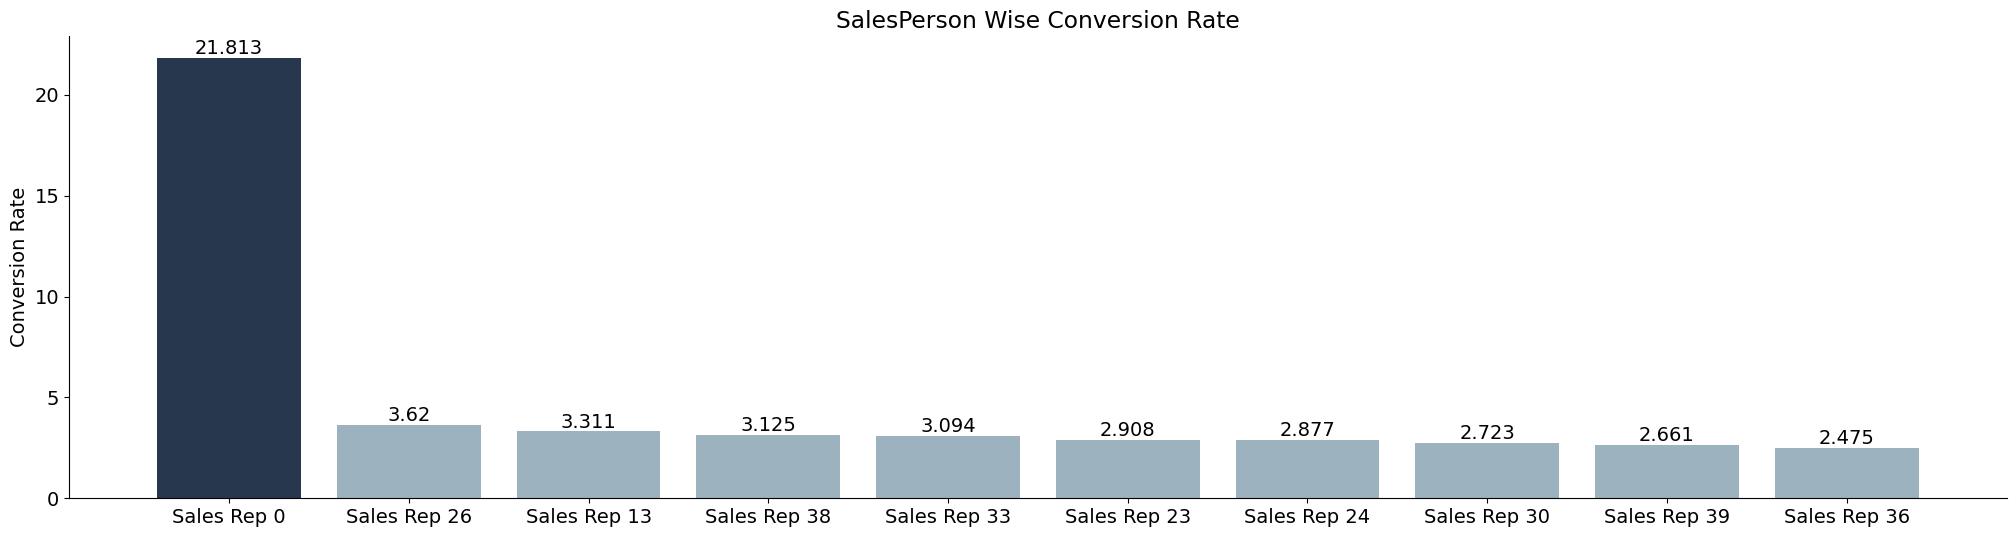

In [37]:
query = '''
WITH cte AS (
    SELECT 
        AssignedTo, 
        COUNT(AssignedTo) AS Assigned,
        ROUND(COUNT(ConvertedBy) * 1.0 / (SELECT COUNT(*) FROM travels WHERE ConvertedBy IS NOT NULL) * 100, 3) 
                        AS Conversion_Rate,
        COALESCE(SUM(TotalBill),0) AS totalBill,
        COALESCE(ROUND(AVG(julianday(ConversionDate) - julianday(LeadDate)), 2),0) AS avgConversionTime
    FROM travels
    GROUP BY AssignedTo
),

rank_cte AS (
    SELECT 
        *, 
        DENSE_RANK() OVER (ORDER BY Conversion_Rate DESC) AS Conv_rank,
        DENSE_RANK() OVER (ORDER BY totalBill DESC) AS Bill_rank,
        DENSE_RANK() OVER (ORDER BY avgConversionTime ASC) AS time_rank
    FROM cte
),

weighted_cte AS (
    SELECT 
        *, 
        ROUND((Conv_rank + Bill_rank + time_rank) * 1.0 / 3, 2) AS weighted_score 
    FROM rank_cte
)

SELECT 
    AssignedTo, 
    Assigned, 
    Conversion_Rate, 
    avgConversionTime,
    totalBill,
    weighted_score,
    DENSE_RANK() OVER (ORDER BY weighted_score ASC) AS weighted_rank
FROM weighted_cte 
ORDER BY Conversion_Rate desc
LIMIT 10
'''

temp = pd.read_sql(query, conn)
temp['AssignedTo']  = temp['AssignedTo'].str.replace("Person", 'Rep')
COLORS =['#9DB2BF'] * len(temp)
COLORS[0] = '#27374D'
ax = plt.bar(data=temp, x='AssignedTo', height = 'Conversion_Rate', color=COLORS)
plt.bar_label(ax)
plt.title('SalesPerson Wise Conversion Rate')
plt.ylabel('Conversion Rate')
plt.show()

In [38]:
query = '''
WITH cte AS (
    SELECT 
        AssignedTo, 
        COUNT(AssignedTo) AS Assigned,
        ROUND(COUNT(ConvertedBy) * 1.0 / (SELECT COUNT(*) FROM travels WHERE ConvertedBy IS NOT NULL) * 100, 3) 
                        AS Conversion_Rate,
        COALESCE(SUM(TotalBill),0) AS totalBill,
        COALESCE(ROUND(AVG(julianday(ConversionDate) - julianday(LeadDate)), 2),0) AS avgConversionTime
    FROM travels
    GROUP BY AssignedTo
),

rank_cte AS (
    SELECT 
        *, 
        DENSE_RANK() OVER (ORDER BY Conversion_Rate DESC) AS Conv_rank,
        DENSE_RANK() OVER (ORDER BY totalBill DESC) AS Bill_rank,
        DENSE_RANK() OVER (ORDER BY avgConversionTime ASC) AS time_rank
    FROM cte
),

weighted_cte AS (
    SELECT 
        *, 
        ROUND((Conv_rank + Bill_rank + time_rank) * 1.0 / 3, 2) AS weighted_score 
    FROM rank_cte
)

SELECT 
    AssignedTo, 
    Assigned, 
    Conversion_Rate, 
    avgConversionTime,
    totalBill,
    weighted_score,
    DENSE_RANK() OVER (ORDER BY weighted_score ASC) AS weighted_rank
FROM weighted_cte 
ORDER BY weighted_rank ASC;
'''

sales_rep_scorecard = pd.read_sql(query, conn)
sales_rep_scorecard.head()

,AssignedTo,Assigned,Conversion_Rate,avgConversionTime,totalBill,weighted_score,weighted_rank
0,Sales Person 13,1755,3.311,7.57,511735.0,6.67,1
1,Sales Person 26,1839,3.620,8.08,449671.0,8.00,2
2,Sales Person 0,22205,21.813,10.56,3526204.0,9.67,3
3,Sales Person 39,1862,2.661,9.38,421773.0,13.00,4
4,Sales Person 33,1443,3.094,12.01,805743.0,14.67,5


*INSIGHT*

The sales performance analysis highlights clear differences in the team. Top performers like Sales Person 13 excel in conversion rates, revenue, and speed, while bottom performers such as Sales Person 52, 49, and 50 struggle with low conversion rates and slow times. Sales Person 52’s missing data also skews their performance. The key takeaway is that balancing fast conversions with high revenue leads to better results, while those with low scores need improvements in conversion speed and revenue. Regular monitoring and targeted training can help address these gaps and improve overall performance.

In [39]:
query = '''
SELECT 'Sales Rep 0' as AssignedTo, Trip, COUNT(Trip) AS TripCount 
FROM travels 
WHERE Status = 'Converted' 
    AND AssignedTo = 'Sales Person 0' 
    AND (LOWER(Trip) NOT LIKE '%reject%' AND LOWER(Trip) NOT LIKE '%cancel%')
GROUP BY Trip 
HAVING COUNT(Trip) > 10 
ORDER BY TripCount DESC;
'''
top_guy_trips = pd.read_sql(query, conn)
top_guy_trips

,AssignedTo,Trip,TripCount
0,Sales Rep 0,BYOG,88
1,Sales Rep 0,Spiti Winter (6N/7D) - Exclusive Escape,50
2,Sales Rep 0,BYOG - International,45
3,Sales Rep 0,Chopta Tungnath (2N/3D),38
4,Sales Rep 0,Meghalaya With Kaziranga (6N/7D),34
5,Sales Rep 0,Tirthan Valley (2N/3D),27
6,Sales Rep 0,McLeod Bir Tirthan (4N/5D),26
7,Sales Rep 0,Leh to Leh with Turtuk Tso Moriri(7N/8D),24
8,Sales Rep 0,Spiti Winter (6N/7D) - Bliss in Budget,22
9,Sales Rep 0,Kasol Kheerganga (2N/3D),22


- Sales Rep 0 is achieving the highest conversion rate by focusing on popular trips like BYOG which indicates that these trips resonate strongly with customers. 

- This presents an opportunity for other sales reps to replicate this success. By recognizing which trips are driving the highest conversions, other team members can tailor their efforts to promote similar packages, refine their sales pitches, or target customers who are more likely to be interested in those trips.

- In essence, Sales Rep 0’s success with “BYOG” can serve as a model for the rest of the team, helping to boost overall performance by aligning with customer preferences and maximizing conversion potential.

BYOG in the travel industry typically stands for "Bring Your Own Gadget." This concept has gained traction, especially with the rise of remote work and the increasing reliance on technology during travel. Here are some key points about BYOG in this context:

### Key Points about BYOG:
1. **Personal Devices**: Travelers are encouraged to bring their personal devices (laptops, tablets, smartphones) to access services, communicate, or work while traveling.

2. **Connectivity**: Many hotels and travel services provide enhanced connectivity options, allowing guests to utilize their gadgets seamlessly during their stay.

3. **Enhanced Experiences**: BYOG can enhance the travel experience by enabling travelers to use their preferred apps and tools for navigation, communication, and entertainment.

4. **Remote Work**: With the rise of remote work, BYOG supports business travelers who need to stay connected and productive while on the go.

5. **Tech Integration**: Travel companies may offer integrations or services tailored to personal devices, such as mobile check-ins, app-based room controls, or personalized travel itineraries.

In [40]:
query = '''
SELECT LeadSource, COUNT(LeadSource) AS TripCount 
FROM travels 
WHERE Status = 'Converted' 
    AND AssignedTo = 'Sales Person 0' 
    AND Trip = 'BYOG'
    AND (LOWER(Trip) NOT LIKE '%reject%' AND LOWER(Trip) NOT LIKE '%cancel%')
GROUP BY LeadSource 
ORDER BY TripCount DESC;
'''
lead_source_df = pd.read_sql(query, conn)
lead_source_df

,LeadSource,TripCount
0,Lead Source 1,61
1,Lead Source 3,17
2,Lead Source 2,10


- Lead Source 1 contributes the most trips (61), followed by Lead Source 3 (17) and Lead Source 2 (10), indicating that Lead Source 1 is the dominant source in driving trip conversions.

- The top sales person has taken the BYOG trips the most and those trips / leads have come from the Lead Source 1.

**Question** - Which Sales Person Did the best and the worst (conversion rate wise) in each Lead Source??

In [41]:
query = '''
with cte as (
        select LeadSource, AssignedTo, 
                round(count(AssignedTo)*1.0/(select count(*) from travels)*100,3) as Conversion_Rate
        from travels where Status = 'Converted'
        group by 1,2),
rn_cte as (select *, row_number() over(partition by LeadSource 
            order by Conversion_Rate desc) as row_num 
            from cte)

select LeadSource, AssignedTo, Conversion_Rate from rn_cte where row_num = 1
'''
lead_assigned_to = pd.read_sql(query, conn)
lead_assigned_to

,LeadSource,AssignedTo,Conversion_Rate
0,Lead Source 1,Sales Person 0,0.474
1,Lead Source 2,Sales Person 0,0.061
2,Lead Source 3,Sales Person 0,0.219


**Insight** 

- Sales Person 0's highest conversion rate is from Lead Source 1 (0.474%), followed by Lead Source 3 (0.219%) and Lead Source 2 (0.061%). This suggests that Sales Person 0 is more successful at converting leads from Lead Source 1 and should focus on improving conversion strategies for the other sources, particularly Lead Source 2.

In [42]:
query = '''
with cte as (
        select LeadSource, AssignedTo, round(count(AssignedTo)*1.0/(select count(*) from travels)*100,3) as Conversion_Rate
        from travels where Status = 'Converted'
        group by 1,2),
rn_cte as (select *, row_number() over(partition by LeadSource 
            order by Conversion_Rate asc) as row_num from cte)

select LeadSource, AssignedTo, Conversion_Rate from rn_cte where row_num = 1
'''
lead_assigned_to_bottom = pd.read_sql(query, conn)
lead_assigned_to_bottom

,LeadSource,AssignedTo,Conversion_Rate
0,Lead Source 1,Sales Person 49,0.001
1,Lead Source 2,Sales Person 12,0.001
2,Lead Source 3,Sales Person 12,0.001


**Insight** -  

- Sales Person 49 has the least conversion rate in Lead Source 1.
- Sales Person 12 has the least conversion rate in Lead Source 2 and 3.


10. **What is the average conversion time (time from lead date to conversion date)?**

In [43]:
cols = list(df.columns[df.columns.str.contains('Date')])
for i in cols:
    df[i] = pd.to_datetime(df[i])
conv_days = (df['ConversionDate'] -  df['LeadDate']).mean().days
print(f'It takes an avg of {conv_days} days to convert a lead')

It takes an avg of 10 days to convert a lead


Given that it takes an average of 10 days to convert a lead, focusing on improving the lead conversion process can help reduce this time frame. With higher conversion rates for certain lead sources, a targeted strategy could improve efficiency, particularly for Lead Sources 2 and 3. Streamlining communication, speeding up responses, and providing quick follow-ups could also help reduce the conversion time. Additionally, focusing on nurturing leads more effectively could accelerate conversions for all sources.

11. **What is the average cost per person and total bill for converted leads?**

In [44]:
query = '''
select round(avg(PerPersonCost),2) as Avg_PerPersonCost,
      round(avg(TotalBill),2) as Avg_TotalBill
from travels

'''
cost_bill = pd.read_sql(query, conn)
cost_bill

,Avg_PerPersonCost,Avg_TotalBill
0,2747.94,5778.49


12. **Which EnquiryDestination has the highest average total Bill?**

In [45]:
query = '''
select EnquiryDestination, round(avg(PerPersonCost),2) as AvgPerPersonCost,
      round(avg(TotalBill),2) as AvgTotalBill
from travels where EnquiryDestination is not null
group by 1
having round(avg(PerPersonCost),2) > 0
order by 3 desc limit 1

'''
EnquiryDestination = pd.read_sql(query, conn)
EnquiryDestination

,EnquiryDestination,AvgPerPersonCost,AvgTotalBill
0,Ladakh - Manali to Manali,3024.0,24192.0


13. Which EnquiryDestination has the highest average per person cost?

In [46]:
query = '''
select EnquiryDestination, round(avg(PerPersonCost),2) as AvgPerPersonCost,
        round(avg(TotalBill),2) as AvgTotalBill
from travels where EnquiryDestination is not null
group by 1 having round(avg(PerPersonCost),2) > 0
order by 2 desc limit 1

'''
EnquiryDestination_avgCost = pd.read_sql(query, conn)
EnquiryDestination_avgCost

,EnquiryDestination,AvgPerPersonCost,AvgTotalBill
0,Europe BYOG,10075.56,15069.44


## Specific Insights and Anomalies
13. **Are there any notable trends in trip dates? (e.g., seasonality)**

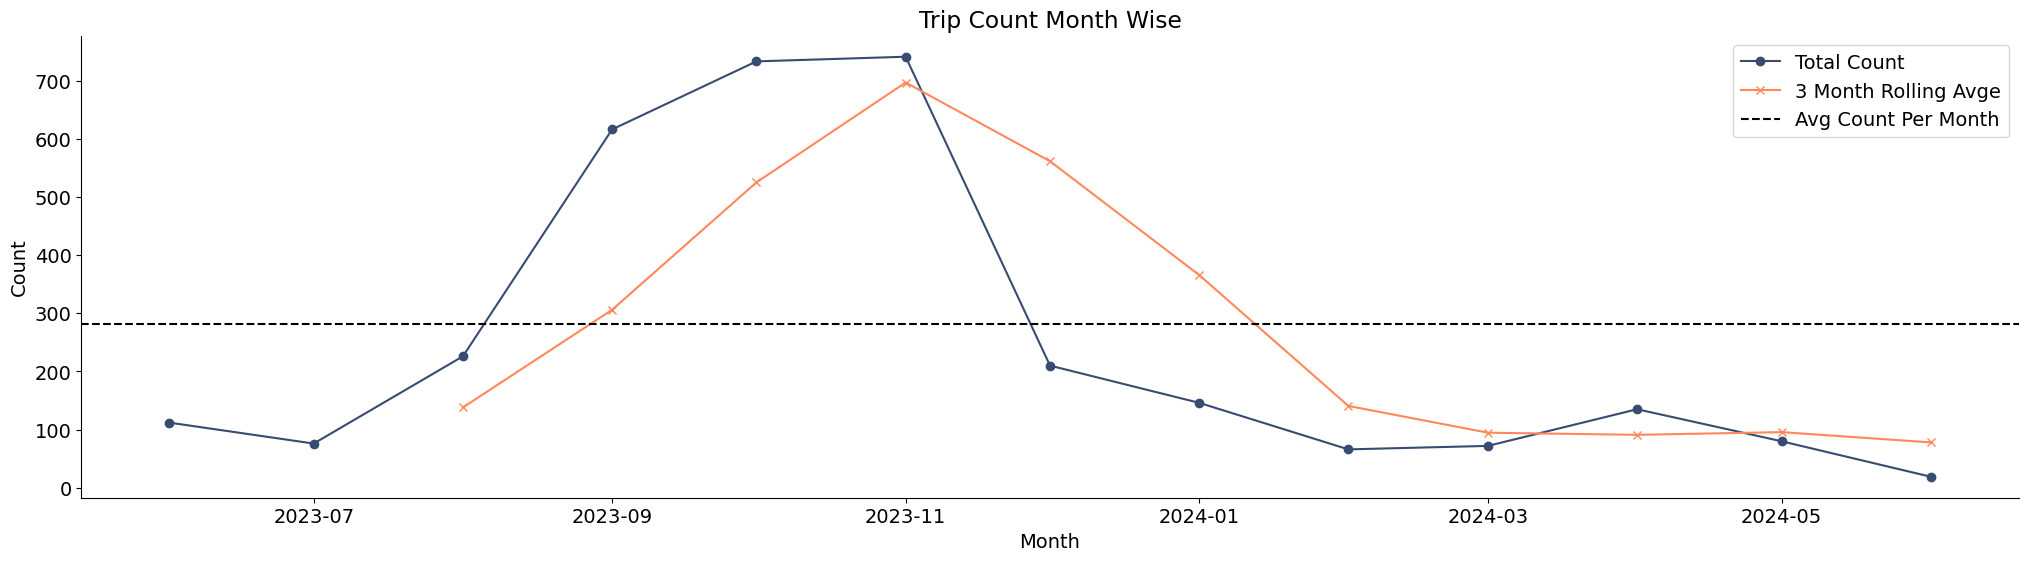

In [47]:
query = '''
WITH cte AS (
    SELECT strftime("%Y-%m", TripDate) AS TripDate, 
           COUNT(TripDate) AS Trips 
    FROM Travels 
    WHERE TripDate IS NOT NULL 
    GROUP BY 1 
    ORDER BY 1
)
SELECT *, 
       ROUND(SUM(Trips) OVER() * 1.0 / (SELECT COUNT(Trips) FROM cte), 0) AS Average 
FROM cte
'''
monthly_trips = pd.read_sql(query, conn)
# Convert TripDate to datetime
monthly_trips['TripDate'] = pd.to_datetime(monthly_trips['TripDate']).dt.date
# Calculate the rolling average
monthly_trips['RollingAverage'] = monthly_trips['Trips'].rolling(3).mean()
# Plotting
plt.plot(monthly_trips['TripDate'], monthly_trips['Trips'], label='Total Count', marker='o', color='#384B70')
plt.plot(monthly_trips['TripDate'], monthly_trips['RollingAverage'], label='3 Month Rolling Avge', marker='x', color='#FF885B')
plt.axhline(y=monthly_trips['RollingAverage'].mean(), linestyle='dashed', color='#000000', label='Avg Count Per Month')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.xlabel('Month')
plt.title('Trip Count Month Wise')
plt.legend()
plt.show()

The data indicates significant fluctuations, with the peak Trips count in October 2023 (733), followed by a slight decline in the following months (with an average of 249 Trips per month). The rolling average, which smooths out these fluctuations, gradually increased from 138 trips in August 2023 to 696 in November 2023. The trend reveals seasonal variations, with dips in certain months (such as February 2024) and increases towards the end of the year. This suggests a cyclical pattern in visitor numbers.

14. **Do ex-clients tend to have higher or lower conversion rates and average bill amounts compared to new clients?**

In [48]:
query = '''
select ExClient, 
    round(sum(case when ExClient = 'Yes' and Status = 'Converted' then 1 else 0 end)*1.0/count(*)*100,3) as ExClient_ConvPct,
    round(sum(case when ExClient is null and Status = 'Converted' then 1 else 0 end)*1.0/count(*)*100,3) as NewClient_ConvPct
    from travels
  group by ExClient

'''
temp = pd.read_sql(query, conn)
temp['ExClient'][0] ='No'
temp

,ExClient,ExClient_ConvPct,NewClient_ConvPct
0,No,0.000,2.988
1,Yes,15.819,0.000


**Insight**

- We have more conversion rate from ExClient as opposed to New Client. 
- 15% Conversion Rate is from ExClient however we have only 2% Conversion Rate from old Client which means we are not doing a good job in attracting new clients and converting them.


15. **Are there any anomalies or outliers in the data? (e.g., extremely high or low costs, unusually long or short conversion times)**

In [49]:
def get_outliers(df, col):
    q1, q2, q3 = list(df[col].quantile([0.25, 0.5, 0.75]).values)
    iqr = q3 - q1
    upperbound= q3 + 1.5 * iqr
    lowerbound = q1 - 1.5 * iqr
    outliers = df[(df[col]>upperbound) |  (df[col]<lowerbound)]
    return outliers

In [50]:
#Outliers Based on PerPersonCost
PerPersonCost_outliers = get_outliers(df, 'PerPersonCost').reset_index(drop=True)
PerPersonCost_outliers.head()

,LeadDate,LeadSource,Name,Phone,AssignedTo,EnquiryDestination,ExClient,Status,ConversionDate,Trip,TripDate,BookingID,Pax,PerPersonCost,TotalBill,ConvertedBy,Date,Month,TripYear,LeadYear
0,2023-07-17 00:22:00,Lead Source 1,Tr,)&$**&)^)^,Sales Person 27,NaN,NaN,Converted,2023-07-25 18:01:52,BYOG,2023-06-17,WON)^!&#),2.0,5560.0,11120.0,Sales Person 27,2023-07-17,Jul,2023.0,2023
1,2023-07-17 03:39:00,Lead Source 3,fm{mOfHns n,(&@**)##^!,Sales Person 11,Kerala BYOG,Yes,Converted,2023-07-31 20:53:36,Bali Backpacking (6N/7D) - Ex-Delhi,2023-09-05,WOI))(*^%,1.0,7056.0,7056.0,Sales Person 22,2023-07-17,Jul,2023.0,2023
2,2023-07-18 04:59:00,Lead Source 3,Snnmi,(@@@#(&%$),Sales Person 0,Spiti Valley,NaN,Converted,2023-08-18 19:33:15,BYOG - International,2023-11-28,WOI))(@$@,1.0,13684.0,13684.0,Sales Person 41,2023-07-18,Jul,2023.0,2023
3,2023-07-19 15:18:00,Lead Source 1,Fznfnyqs {mXs,)(*$(((**(,Sales Person 8,NaN,NaN,Converted,2023-07-31 22:33:48,Vietnam Backpacking (7N/8D),2023-09-04,WOI))(*^#,1.0,7447.0,7447.0,Sales Person 8,2023-07-19,Jul,2023.0,2023
4,2023-07-19 16:28:00,Lead Source 1,fmnjmplygFx uz,(#(&^%@)*#,Sales Person 17,NaN,NaN,Converted,2023-07-23 13:48:29,Bali Backpacking (6N/7D) - Ex-Mumbai,2023-09-05,WOI))($#%,1.0,6968.0,6968.0,Sales Person 17,2023-07-19,Jul,2023.0,2023


In [51]:
# Analyze Total Bill for PerPersonCost Outliers
total_bill_outliers = PerPersonCost_outliers['TotalBill'].sum()
average_bill_outliers = round(PerPersonCost_outliers['TotalBill'].mean(),2)

print(f"Sum Total Bill for PerPersonCost Outliers: {total_bill_outliers:,}")
print(f"Average Total Bill for PerPersonCost Outliers: {average_bill_outliers:,}")

Sum Total Bill for PerPersonCost Outliers: 4,182,135.0
Average Total Bill for PerPersonCost Outliers: 18,104.48


In [52]:
TotalBillOutliers = get_outliers(df, 'TotalBill').reset_index(drop=True)
TotalBillOutliers.head()

,LeadDate,LeadSource,Name,Phone,AssignedTo,EnquiryDestination,ExClient,Status,ConversionDate,Trip,TripDate,BookingID,Pax,PerPersonCost,TotalBill,ConvertedBy,Date,Month,TripYear,LeadYear
0,2023-07-18 04:59:00,Lead Source 3,Snnmi,(@@@#(&%$),Sales Person 0,Spiti Valley,NaN,Converted,2023-08-18 19:33:15,BYOG - International,2023-11-28,WOI))(@$@,1.0,13684.0,13684.0,Sales Person 41,2023-07-18,Jul,2023.0,2023
1,2023-07-19 22:55:00,Lead Source 1,mfInx,)@##&@@%&#,Sales Person 0,Spiti Valley,NaN,Converted,2023-07-28 19:09:18,BYOG,2023-08-06,WON)^!(@!,12.0,1707.0,20481.0,Sales Person 61,2023-07-19,Jul,2023.0,2023
2,2023-07-20 17:31:00,Lead Source 1,~fSf{,*(*^)!)^(^,Sales Person 35,NaN,NaN,Converted,2023-07-29 14:03:33,BYOG - International,2023-12-30,WOI))(*)),10.0,1460.0,14600.0,Sales Person 67,2023-07-20,Jul,2023.0,2023
3,2023-07-20 18:18:00,Lead Source 1,Inmxf,)@##&@@%&#,Sales Person 0,Bali,NaN,Converted,2023-07-28 19:09:18,BYOG,2023-08-06,WON)^!(@!,12.0,1707.0,20481.0,Sales Person 61,2023-07-20,Jul,2023.0,2023
4,2023-07-21 19:37:00,Lead Source 1,Poffnjssy,)(#@!()^^%,Sales Person 32,NaN,Yes,Converted,2023-07-24 12:15:51,Leh Ladakh(Srinagar to Manali),2023-11-07,WON)^!&*$,5.0,2831.0,14154.0,Sales Person 32,2023-07-21,Jul,2023.0,2023


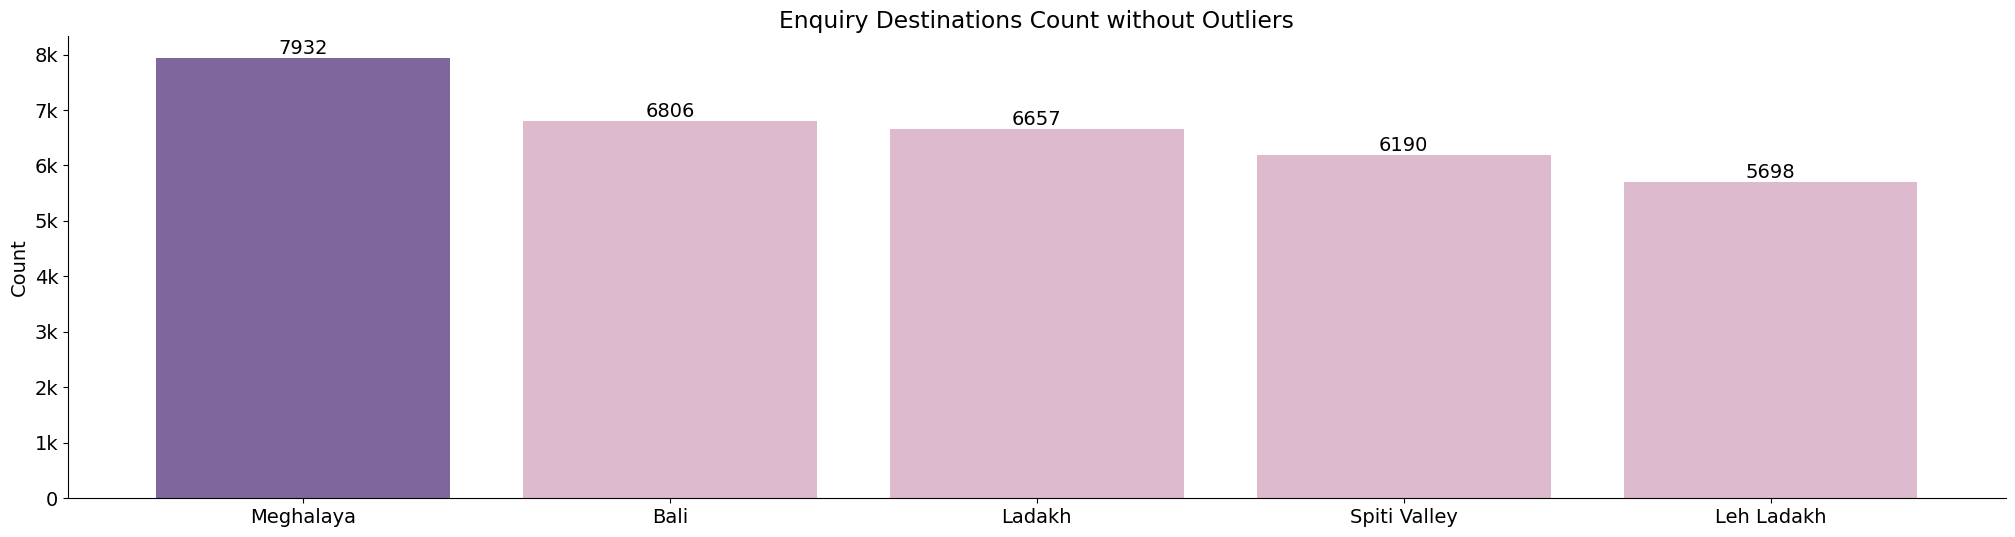

In [53]:
# Enquiry Destinations for PerPersonCost Outliers
destinations_With_outliers = pd.DataFrame(df['EnquiryDestination'].value_counts().head(5)).reset_index()
COLORS = ['#DEBACE'] * len(destinations_With_outliers)
COLORS[0] = '#7F669D'  
ax = plt.bar(destinations_With_outliers['EnquiryDestination'], destinations_With_outliers['count'], color=COLORS)
plt.bar_label(ax)
yticks = plt.gca().get_yticks()
ylabels = [f"{round(i / 1000)}k" if i != 0 else "0" for i in yticks]
plt.gca().set_yticklabels(ylabels)
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.title('Enquiry Destinations Count without Outliers')
plt.show()

**Insight**

- In the entire Dataset, the destination that is being asked about the most is Meghalaya.

In [54]:
# Enquiry Destinations for PerPersonCost Outliers
destinations_outliers = PerPersonCost_outliers['EnquiryDestination'].value_counts().head(5)
print("Enquiry Destinations for Outliers:")
destinations_outliers

Enquiry Destinations for Outliers:


EnquiryDestination
Europe           27
Bali             25
Vietnam          25
BYOG - Europe     8
Europe BYOG       7
Name: count, dtype: int64

**Insight**

- The outliers are the people who are interested in visiting places outside of India which could mean Higher Revenue and if served well they may become recurring customers.

In [55]:
# Compare PerPersonCost Outliers with Non-Outliers
non_outliers = df[~df.index.isin(PerPersonCost_outliers.index)]
with_outliers = round(df['TotalBill'].mean(),2)
average_bill_non_outliers = round(non_outliers['TotalBill'].mean(),2)
print(f"Average Total Bill With Outliers: {with_outliers:,}")
print(f"Average Total Bill Without Outliers: {average_bill_non_outliers:,}")

Average Total Bill With Outliers: 5,778.49
Average Total Bill Without Outliers: 5,782.05


## Advanced Analysis and Strategic Insights
16. **What is the relationship between the number of passengers (Pax) and the total bill?**

In [56]:
df[['Pax', 'TotalBill']].corr().apply(lambda x : round(x, 2))

,Pax,TotalBill
Pax,1.00,0.57
TotalBill,0.57,1.00


**Insight**

- There is a moderately strong correlation between the number of passengers and the total bill. This suggests that as the number of passengers increases, the total bill tends to rise as well, though the relationship is not perfect. Other factors may also influence the total bill, but the trend indicates that more passengers generally result in a higher total expenditure.

In [57]:
# Create bins for Pax
bins = [0, 2, 4, 6, 8, 10, 20]
labels = ['0-2', '2-4', '4-6', '6-8', '8-10', '10+']
df['Pax_Binned'] = pd.cut(df['Pax'], bins=bins, labels=labels, right=False)

# Calculate average PerPersonCost for each Pax bin
grouped = df.groupby('Pax_Binned')['TotalBill'].mean()

# Perform ANOVA
anova_result = stats.f_oneway(
    df[df['Pax_Binned'] == '0-2']['TotalBill'],
    df[df['Pax_Binned'] == '2-4']['TotalBill'],
    df[df['Pax_Binned'] == '4-6']['TotalBill'],
    df[df['Pax_Binned'] == '6-8']['TotalBill'],
    df[df['Pax_Binned'] == '8-10']['TotalBill'],
    df[df['Pax_Binned'] == '10+']['TotalBill']
)

print(f"ANOVA test result: F-statistic = {round(anova_result.statistic,3)}, p-value = {anova_result.pvalue:.2e}")

ANOVA test result: F-statistic = 280.401, p-value = 1.32e-249


**Interpreting the ANOVA Result**

The ANOVA results show a high F-statistic of 280.4006, indicating a significant difference in TotalBill across different Pax groups. With a very low p-value, the null hypothesis is rejected, suggesting that the number of passengers has a significant impact on the total bill. Strategically, this means optimizing passenger numbers and understanding their effect on the total bill can be crucial for business decisions and pricing models.

In [58]:
df[['Pax', 'PerPersonCost']].corr().apply(lambda x : round(x, 4))

,Pax,PerPersonCost
Pax,1.0000,-0.0035
PerPersonCost,-0.0035,1.0000


**Insight** - There doesn't seem to be much relationship between the Passenger count and PerPersonCost however there is a 0.57 correlation between the Number of Passengers and the total Bill which means if passengers increase there is a 0.57 probability that Total Bill will also increase.


17. **How does the performance of different agents compare?**

In [59]:
query = '''
select AssignedTo, count(AssignedTo) as AssignedLeads,
      count(ConvertedBy) as ConvertedLeads,
      round(count(ConvertedBy)*1.0/count(AssignedTo)*100,2) as ConversionRate,
      coalesce(sum(TotalBill),0) as TotalBill
from travels group by 1 order by 4 desc

'''
SalesPerson_df = pd.read_sql(query, conn)

SalesPerson_df['TotalBill'] = [f"{round(i / 1000,2)}k" if i != 0 else "0" \
                               for i in SalesPerson_df['TotalBill'].values.tolist()]

#Top 5 rows
SalesPerson_df.head()

,AssignedTo,AssignedLeads,ConvertedLeads,ConversionRate,TotalBill
0,Sales Person 33,1443,100,6.93,805.74k
1,Sales Person 26,1839,117,6.36,449.67k
2,Sales Person 38,1622,101,6.23,199.93k
3,Sales Person 13,1755,107,6.10,511.74k
4,Sales Person 30,1467,88,6.00,224.25k


In [60]:
#Bottom 5 rows
SalesPerson_df.tail()

,AssignedTo,AssignedLeads,ConvertedLeads,ConversionRate,TotalBill
50,Sales Person 4,1592,26,1.63,146.92k
51,Sales Person 25,1468,23,1.57,104.41k
52,Sales Person 12,1285,16,1.25,156.69k
53,Sales Person 5,1930,24,1.24,150.71k
54,Sales Person 52,128,0,0.00,0


**Insight**

- Sales Person 33 is able to convert more leads assigned to him as compared to his counter parts
- Other Sales Person who have more leads assigned to them are not able to achieve a higher conversion rate than Sales Person 33.


18. **What are the key factors influencing conversion rates? (e.g., lead source, enquiry destination, assigned agent)**

In order to find the key factors, lets take a lot at the performance of the Sales Person 33 who has the highest conversion rate.

In [61]:
sources = list(df[(df['AssignedTo']=='Sales Person 33') & (df['Status']=='Converted')]['LeadSource'].values)
sources_dict = {i : sources.count(i) for i in sources if i!= None}
sources_dict_sorted = dict(sorted(sources_dict.items(), key= lambda x:x[-1], reverse=True))
sources_dict_sorted

{'Lead Source 1': 59, 'Lead Source 2': 22, 'Lead Source 3': 19}

In [62]:
places = list(df[(df['AssignedTo']=='Sales Person 33') & (df['Status']=='Converted')]['EnquiryDestination'].values)
places_dict = {i : places.count(i) for i in places if i!= None}
places_dict_sorted = dict(sorted(places_dict.items(), key= lambda x:x[-1], reverse=True))
print(places_dict_sorted)

{nan: 37, 'Ladakh': 32, 'Leh Ladakh': 15, 'Ladakh BYOG': 9, 'Unknown': 2, 'Himachal Trips': 2, 'Early Bird Offer': 1, 'Manali Solang': 1, 'Spiti Valley': 1}


**Insight** - 

- The analysis above is helpful to identify the top-performing salesperson's lead sources and destinations. 
- If one salesperson consistently converts leads from a certain source and destination, we can replicate that success with others to improve overall performance.

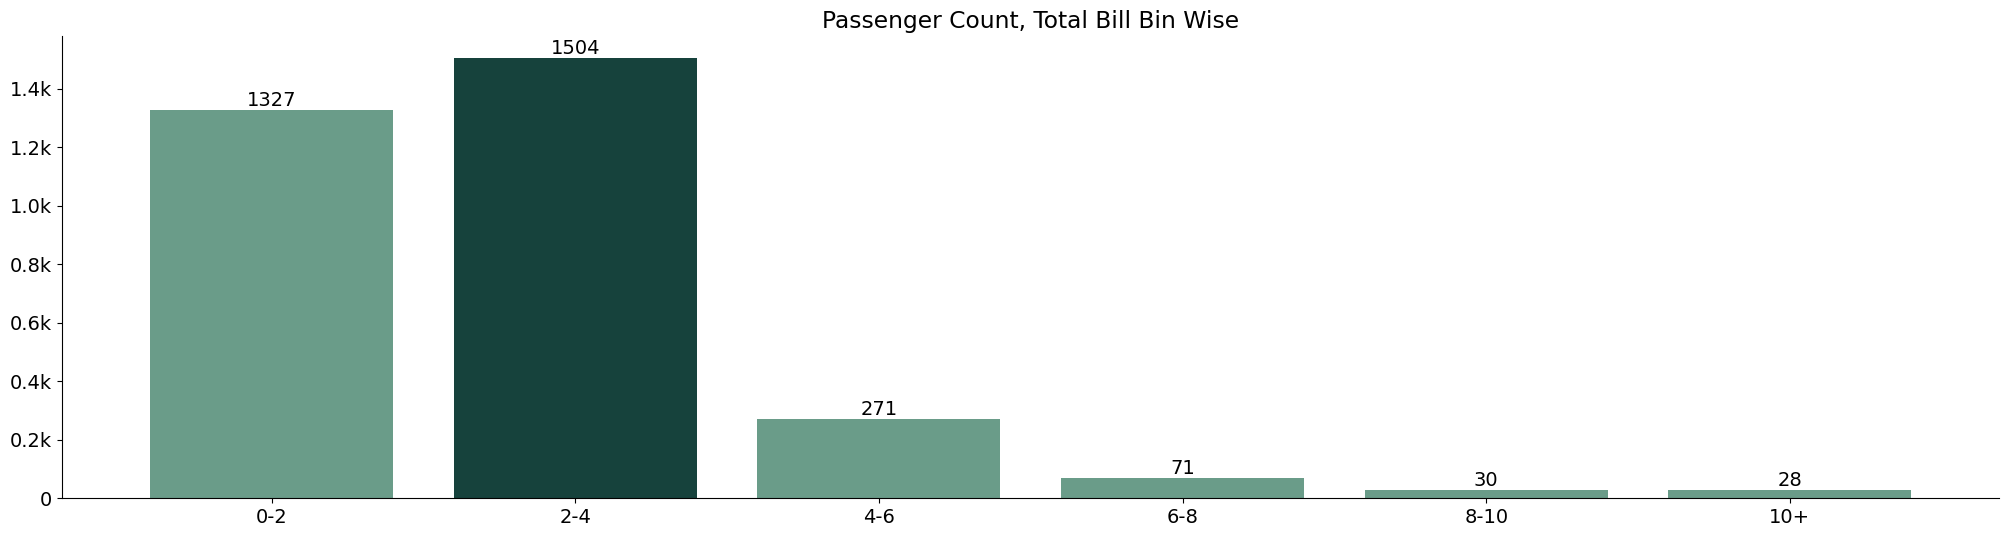

In [63]:
binned = df.groupby('Pax_Binned')['TotalBill'].agg(['sum','count'])
COLORS = ['#6A9C89'] * len(destinations_With_outliers)
COLORS[1] = '#16423C'
ax = plt.bar(binned.index, binned['count'], color=COLORS)
plt.bar_label(ax)
yticks = plt.gca().get_yticks()
ylabels = [f"{round(i / 1000,1)}k" if i != 0 else "0" for i in yticks]
plt.gca().set_yticklabels(ylabels)
plt.xticks(rotation=0)
plt.title('Passenger Count, Total Bill Bin Wise')
plt.show()

In [64]:
total = binned.reset_index()['count'].values.sum()
binned['Pct_Count'] = np.around(binned.reset_index()['count'].values/total*100.0,2)
binned['sum'] = [f"{round(i / 10000,2)}k" if i != 0 else "0" for i in binned['sum'].values.tolist()]
binned = binned.reset_index()
binned.columns = ['TotalBill_Bin', 'Amount', 'TripCount', 'Pct_Count']
binned

,TotalBill_Bin,Amount,TripCount,Pct_Count
0,0-2,346.79k,1327,41.07
1,2-4,949.88k,1504,46.55
2,4-6,322.68k,271,8.39
3,6-8,105.15k,71,2.20
4,8-10,65.57k,30,0.93
5,10+,73.55k,28,0.87


**INSIGHT**

- 87% of people prefer to spend less than 400,000 INR on a trip, indicating that most travelers have a specific budget constraint. This insight can help businesses or travel planners tailor their packages to fit the majority’s spending habits, offering more budget-friendly options to attract a larger customer base.

## Correlation and Regression Analysis

We will use Correlation to understand how correlated the trip count and the sales amount are.

In [65]:
def remove_outliers(df, col):
    q1, q2, q3 = list(df[col].quantile([0.25, 0.5, 0.75]).values)
    iqr = q3 - q1
    upperbound= q3 + 1.5 * iqr
    lowerbound = q1 - 1.5 * iqr
    outliers = df[(df[col]<upperbound) |  (df[col]>lowerbound)].reset_index(drop=True)
    return outliers

df_clean = remove_outliers(df, 'TotalBill')
# Group by 'TripDate' and calculate both count and sum
aggregated_data = df_clean.groupby('TripDate').agg(
    Count=('LeadSource', 'count'),  # Replace 'TripID' with the appropriate column for counting trips
    TotalSales=('TotalBill', 'sum')  # Replace 'Sales' with your sales column
).reset_index()

corr = aggregated_data[['Count', 'TotalSales']].corr()['TotalSales']['Count']
print(f"There is a {corr:.3f} correlation between trip count and total bill.")

There is a 0.916 correlation between trip count and total bill.


- There is a very strong positive relationship between the number of trips and the total bill. This means as the trip count increases, the total bill tends to increase proportionally. 

- It suggests that trip activity is a key driver of revenue, emphasizing the importance of boosting trip frequency to achieve higher billing totals. This insight can guide strategic decisions such as optimizing operations or incentivizing more trips to maximize financial outcomes

We will now use Linear Regression model to predict the sales given the trip counts on a given day.

In [66]:
x, y = aggregated_data[['Count']], aggregated_data[['TotalSales']]
reg = LinearRegression()
#fitting the model
reg.fit(x,y)

LinearRegression()

In [67]:
predictions = reg.predict(x).flatten()
# Example: Actual and predicted sales
actual = aggregated_data['TotalSales']  # Replace with your actual values
predicted = aggregated_data['Count']  # Replace with predicted values from your model
# Calculate R²
r2 = r2_score(actual, predictions)
# Calculate MSE
mse = mean_squared_error(actual, predictions)
print(f"R2 Score: {r2:.2f}")
print(f"MSE: {mse:.2f}")

R2 Score: 0.84
MSE: 4228674034.71


The model is reliable for strategic trends but needs fine-tuning for precise forecasting. Stakeholders can use it confidently but should stay aware of potential outliers or adjustments.

In [68]:
values =  [10, 30, 60]
for value in values:
    prediction =  reg.predict([[value]]).flatten()[0]
    print(f"For {value} trips on a given day, expected sales is {prediction:.2f}")

For 10 trips on a given day, expected sales is 66160.43
For 30 trips on a given day, expected sales is 156899.48
For 60 trips on a given day, expected sales is 293008.04



## Putting It All Together
19. **What are the key takeaways from this data analysis?**

The key takeaways from this data analysis is :-

1. **Lead Generation Insights:**
   - **Peak Lead Volume:** Lead count peaks in August (33.55%), with the lowest in July (12.63%), indicating a need to prepare for high lead volumes in the mid-year.
   - **Lead Source 1 Dominates:** Lead Source 1 generates the highest volume of leads (71.17%) but shows inefficiencies in converting those leads to revenue (only 33.72% of revenue).

2. **Trip Performance Insights:**
   - **Seasonal Trip Variations:** August 2023 saw the highest trips (926), with a sharp decline in August 2024 (83.79%). There’s a recovery in October 2024 with a 139.06% increase in trips.
   - **Monthly Fluctuations:** July 2024 had the least trips (64), signaling the need for better performance in the early months of the year.

3. **Revenue Insights:**
   - **Revenue Peaks and Declines:** Revenue peaked in August 2023 (₹5.27M) but saw a decline in October 2024 (₹0.94M). The 2024 recovery shows steady improvement, peaking at ₹1.09M in September.
   - **Low Revenue-Lead Correlation:** A low correlation (0.22) between lead count and revenue highlights inefficiencies in converting leads into revenue.

4. **Destination Insights:**
   - **High Revenue Potential from Ladakh:** Despite fewer leads, Ladakh generates higher revenue (8.52%), indicating high-value customers.
   - **Conversion Rates:** Spiti Valley shows the highest conversion rate (0.277), while destinations like Kashmir and Bhutan show low conversion rates, presenting opportunities for improvement.

5. **Sales Performance Insights:**
   - **Top Performers Stand Out:** Sales Person 0 shows strong conversion rates and should serve as a model for others. Sales Person 33 converts more leads despite being assigned more, suggesting that lead quality matters more than volume.
   - **Low Conversion from Ex-Clients:** While Ex-clients convert at 3.65%, the conversion rate from new clients is only 2%, indicating a need to attract and convert new clients more effectively.

6. **Operational Insights:**
   - **Passenger Count Correlation with Revenue:** A moderate correlation (0.57) exists between the number of passengers and total bill, suggesting more passengers generally lead to higher revenue.

## Recommendations

20. **What strategic recommendations can be made based on this analysis?**

Below are the strategic recommendations that can be made based on the analysis:-


1. **Improve Lead Conversion Efficiency:**
   - **Focus on Lead Source 1:** While Lead Source 1 generates the most leads, improve conversion rates through better lead nurturing, qualification, and follow-up strategies.
   - **Replicate Success from Lead Source 3:** Focus on converting leads from Lead Source 3, as they bring higher revenue despite their lower volume.

2. **Optimize Trip Promotions:**
   - **Increase Early-Year Trip Numbers:** Address the low trip count in July 2024 by launching early-year promotions and packages to boost demand.
   - **Capitalize on Recovery in October:** Analyze the reasons behind the October trip increase and replicate successful strategies for other months.

3. **Boost Revenue by Improving Conversion:**
   - **Enhance Revenue from High-Potential Regions:** Focus on high-revenue generating regions like Ladakh, and explore strategies to increase conversions in underperforming regions like Kashmir and Bhutan.
   - **Optimize for Budget-Conscious Customers:** Since 87% of customers prefer to spend under ₹400,000, create more affordable packages to appeal to a broader customer base.

4. **Sales Strategy Improvements:**
   - **Model Success of Top Performers:** Encourage other salespeople to adopt strategies similar to Sales Person 0, especially promoting high-conversion trips like BYOG.
   - **Target Training to Underperforming Salespeople:** Provide additional training to salespeople with lower conversion rates (e.g., Sales People 52, 49, 50) to improve their efficiency.

5. **Focus on Ex-Client Conversions:**
   - **Nurture Ex-Clients:** Since Ex-clients show a higher conversion rate, invest in targeted outreach to past customers, offering incentives for repeat bookings and upselling.

6. **Operational Adjustments:**
   - **Optimize Passenger Groups:** Since passenger count correlates with total bill, focus on increasing group sizes where possible, adjusting pricing models or optimizing operations to accommodate larger groups.

**Conclusion**

In conclusion, these recommendations provide a strategic approach to optimizing lead management and increasing conversion rates. By focusing on these recommendations, the business can improve lead-to-revenue conversion, capitalize on high-value destinations, enhance customer satisfaction, and boost overall profitability.